<a href="https://colab.research.google.com/github/lucyZihanZ/ML-DL-Projects/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Investigate the balance of the dataset with respect to the outcome variable. Is the outcome variable of the patient being diabetic undersampled? More specifically, what percentage of the total outcomes have the patient as diabetic? You always want to check this with medical data.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
diat = pd.read_csv('diabetes.csv')
print(diat.isnull().sum())
print(diat.head())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


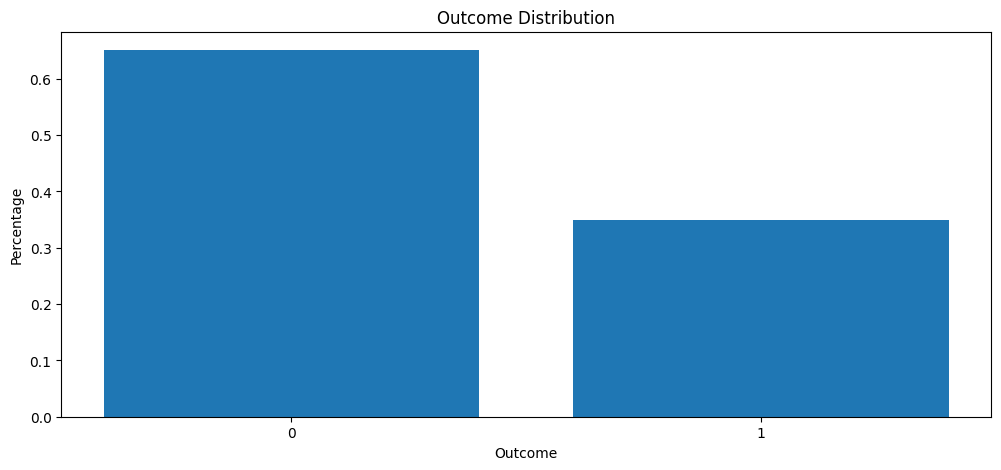

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
is_diat = diat['Outcome'].value_counts()
is_diat_percent = is_diat/len(diat) # diat: 0.6510 not diat: 0.3489
plt.bar(is_diat_percent.index, is_diat_percent.values)
plt.xticks(is_diat.index)
plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Outcome Distribution')
plt.show()
print(is_diat_percent)

Best C: 0.5 with accuracy: 0.8247


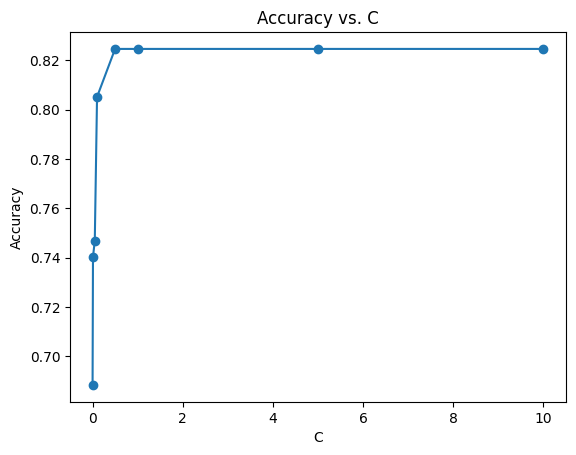

                    Feature  Coefficient
0               Pregnancies     0.086400
1                   Glucose     0.030819
2             BloodPressure    -0.015201
3             SkinThickness     0.004618
4                   Insulin    -0.001137
5                       BMI     0.074017
6  DiabetesPedigreeFunction     0.600874
7                       Age     0.016750


In [ ]:
from sklearn.metrics import accuracy_score
# Prepare data
X = diat.drop('Outcome', axis=1)
y = diat['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Try multiple C values (inverse of regularization strength)
C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
best_C = None
best_acc = 0
best_model = None
results = []

for C in C_values:
    logit = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((C, acc))

    if acc > best_acc:
        best_acc = acc
        best_C = C
        best_model = logit
# Print the best alpha
print(f"Best C: {best_C} with accuracy: {best_acc:.4f}")

# Feature importance
feature_names = best_model.feature_names_in_
feature_logit_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model.coef_[0]
})

# Optional: display all results
result_df = pd.DataFrame(results, columns=["C", "Accuracy"])
plt.plot(result_df["C"], result_df["Accuracy"], marker='o')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. C")
plt.show()
print(feature_logit_df)

In [ ]:
X = diat.drop('Outcome', axis=1)
y = diat['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Try multiple C values (inverse of regularization strength)
C_values = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
best_C = None
best_acc = 0
best_model = None
results = []

for C in C_values:
    logit = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((C, acc))

    if acc > best_acc:
        best_acc = acc
        best_C = C
        best_model = logit

# Print best result
print(f"Best C: {best_C} with accuracy: {best_acc:.4f}")

# Feature importance
feature_names = best_model.feature_names_in_
feature_logit_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model.coef_[0]
})
print(feature_logit_df)

NameError: name 'accuracy_score' is not defined

                    Feature  Importance
0               Pregnancies    0.068431
1                   Glucose    0.322562
2             BloodPressure    0.051601
3             SkinThickness    0.052909
4                   Insulin    0.066418
5                       BMI    0.169359
6  DiabetesPedigreeFunction    0.095205
7                       Age    0.173515


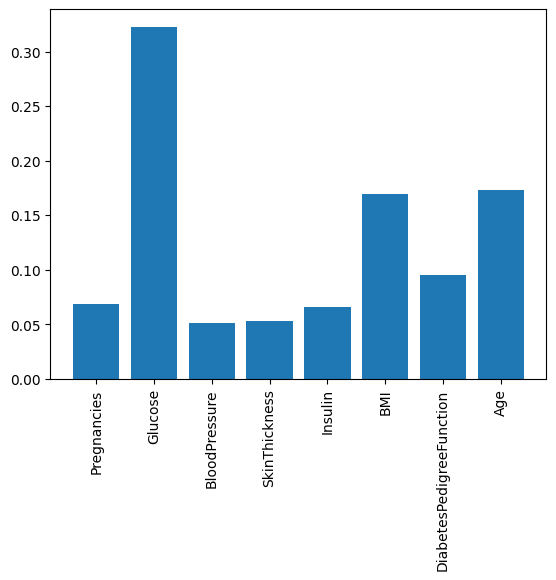

In [ ]:
# Run a random forest on the dataset using SciKitLearn. After training, this classifier will have a field named `feature_importances_' that you can access. For example, if your trained random forest is called 'rfc'
# then you can call 'rfc.feature_importances_' to access feature importance. You can also call 'rfc.feature_names_in_' to get feature names. Doing this,
# what features does the random forest select on?
# when not controlling the max_depth, all features are selected, but the depth may be very deep which cause the problems of overfitting
# So we changed and define the max_depth
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)
y_pred_disc = rfc.predict_proba(X_test)
feature_names = rfc.feature_names_in_
feature_rfc_df = pd.DataFrame({'Feature': feature_names, 'Importance': rfc.feature_importances_})
print(feature_rfc_df)
plt.bar(feature_rfc_df['Feature'], feature_rfc_df['Importance'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
!pip install lime
!pip install lime-tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=556e8c45c4e75b5924c7e54cfe7f8d6a720b0f1d09e30a231642437608ad1cdc
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
ERROR: Could not find a version that satisfies the requirement lime-tabular (from versions: none)
ERROR: No matching distribution found for lime-tabular


In [ ]:
import lime
import lime.lime_tabular


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Non-Diabetic', 'Diabetic'], verbose=True, mode='classification')
instance_idx = 3
exp = explainer.explain_instance(X_test.values[instance_idx], rfc.predict_proba)


# Show the explanation
exp.show_in_notebook(show_table = True)
print(exp.as_list())

Intercept 0.32981843195965355
Prediction_local [0.53288037]
Right: 0.5905848517161503


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('Glucose > 141.00', 0.2818856785292561), ('BMI <= 27.50', -0.1535926465675569), ('Age > 41.00', 0.07999707316974551), ('Insulin > 130.00', 0.03664013247420618), ('3.00 < Pregnancies <= 6.00', -0.0178417685823861), ('0.00 < SkinThickness <= 23.00', -0.015973137930295027), ('62.00 < BloodPressure <= 72.00', -0.014888027143726626), ('0.37 < DiabetesPedigreeFunction <= 0.61', 0.0068346302776301476)]


Not stable

In [ ]:
instance_idx = 6
exp = explainer.explain_instance(X_test.values[instance_idx], rfc.predict_proba)


# Show the explanation
exp.show_in_notebook(show_table = True)
print(exp.as_list())

Intercept 0.2261884365298815
Prediction_local [0.84482493]
Right: 0.791416243922933


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('Glucose > 141.00', 0.28112367323135745), ('29.00 < Age <= 41.00', 0.07756359104429021), ('Pregnancies > 6.00', 0.07424238894231641), ('DiabetesPedigreeFunction > 0.61', 0.07034396891162155), ('32.40 < BMI <= 36.77', 0.05537555231446991), ('Insulin > 130.00', 0.04427776712265744), ('SkinThickness > 32.75', 0.030270511775595824), ('72.00 < BloodPressure <= 80.00', -0.014560964558540248)]


In [ ]:
!pip install shap

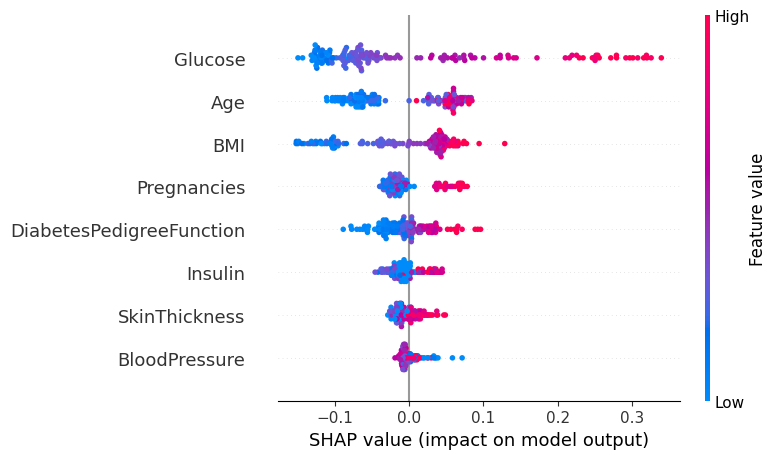

In [ ]:
import shap
explainer = shap.Explainer(rfc, X_train)
shap_values = explainer(X_test)
# For binary classification, use the explanation for class 1 (usually the "positive" class)
shap.summary_plot(shap_values.values[:, :, 1], X_test)


In [ ]:
# for local:
instance_idx = 3

# SHAP force plot (individual explanation)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value[1],
    shap_values=shap_values[instance_idx].values[:,1],
    features=X_test.iloc[instance_idx],
    feature_names=X_test.columns
)


How do LIME, SHAP, Forest importance, and linear model weighting compare? Do they select similar features? For this problem, you may consider LIME and SHAP feature selection on a single example datapoint.

# Predictive Modeling on Animal Images

In [ ]:
!pip install torch
!pip install torchvision
!pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Train Images: torch.Size([45000, 3, 64, 64])
Train Labels: torch.Size([45000])
Val Images: torch.Size([5000, 3, 64, 64])
Val Labels: torch.Size([5000])


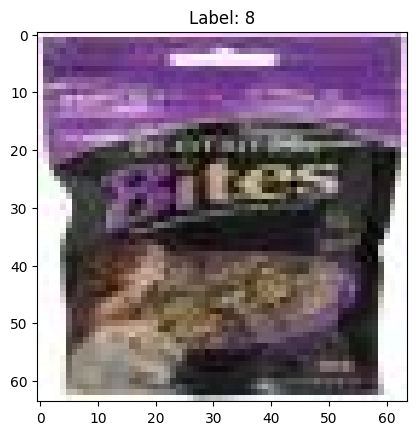

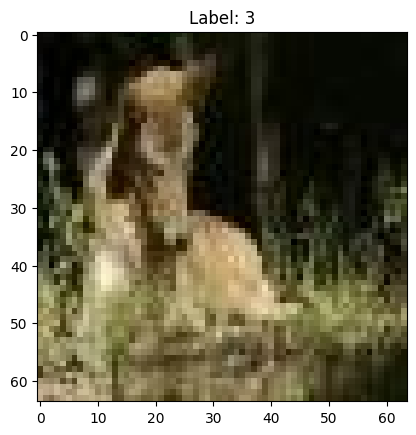

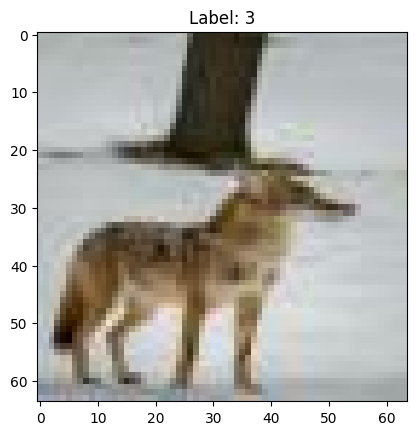

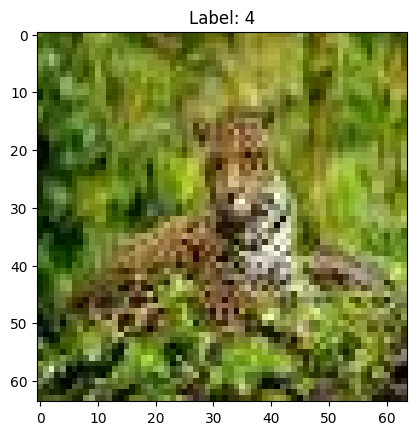

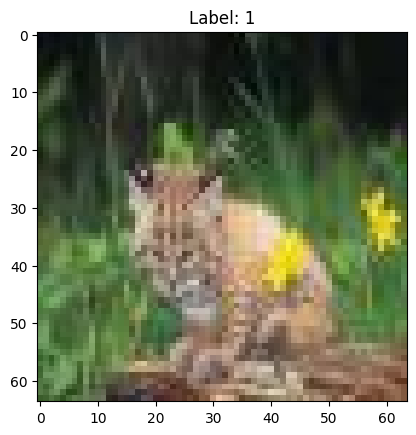

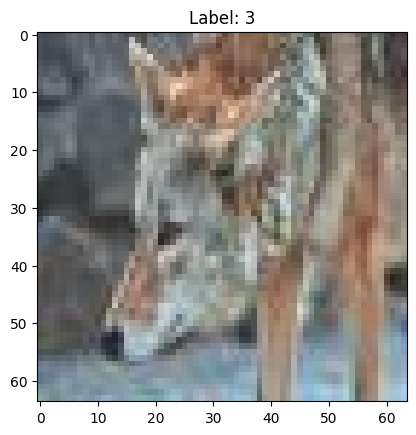

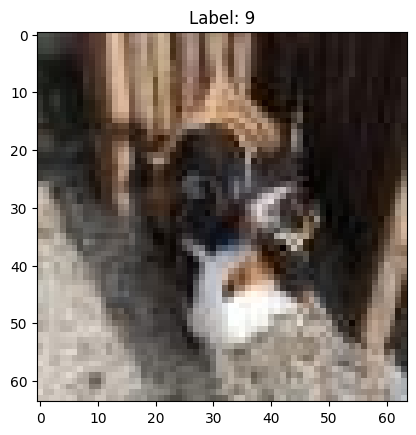

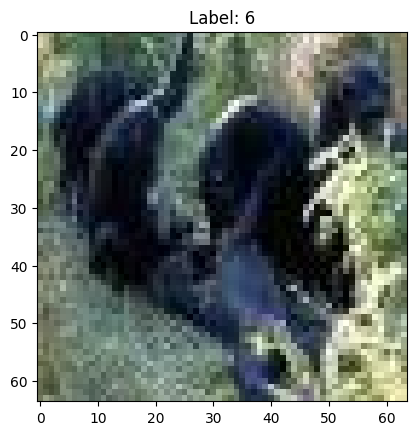

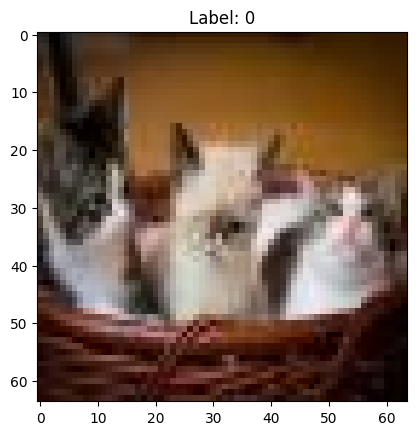

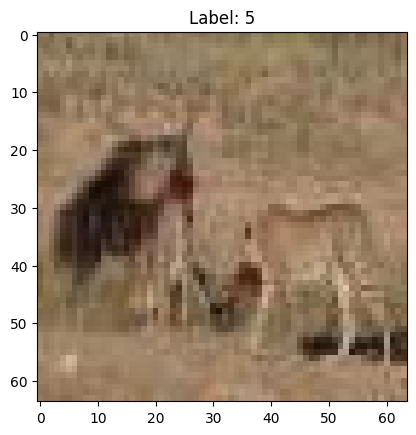

In [ ]:
import data_loader
import torch
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# set parameters
id_bytes = 4
label_bytes = 4
num_train_images = 50000
width = 64
height = 64
depth = 3
n_classes = 10

# load data
train_images, train_labels = data_loader.load_data(
    file_path='data_batch_1.bin',
    id_bytes=id_bytes,
    label_bytes=label_bytes,
    num_images=num_train_images,
    height=height,
    width=width,
    depth=depth
)


train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

# 打印形状
print("Train Images:", train_images.shape)
print("Train Labels:", train_labels.shape)
print("Val Images:", val_images.shape)
print("Val Labels:", val_labels.shape)

# 显示某张图片
for i in range(10):
    plt.imshow(train_images[i].permute(1, 2, 0))  # C×H×W → H×W×C
    plt.title(f"Label: {train_labels[i].item()}")
    plt.show()


In [ ]:
# Define the saving path for trained models
from nn_models_lm import *
import os

save_path = "./saved_models_lm/"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Check device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Specify parameters (information can be found in the readme file)
id_bytes = 4
label_bytes = 4
num_train_files = 1
num_train_images = 50000
width = 64
height = 64
depth = 3
num_classes = 10

# Load training and test data
train_images, train_labels = load_data('data_batch_1.bin', id_bytes, label_bytes, num_train_images,
                                        height, width, depth)

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

norm_train_images = normalize(train_images)
norm_val_images = normalize(val_images)

# initialize a Dataset object for each dataset
dataset_train = TensorDataset(norm_train_images, train_labels)
dataset_val = TensorDataset(norm_val_images, val_labels)

# initialize a model
model = LinearModel()
epochs = 20
batch_size = 128
learning_rate = 0.001

# train the model
model, best_model_save_path, device, train_acc_lm, val_acc_lm, train_loss_lm, val_loss_lm = training_loop(
    model=model,
    dataset_train=dataset_train,
    dataset_val=dataset_val,
    epochs=epochs,
    batch_size=batch_size,
    lr=learning_rate,
    save_path="saved_models_lm/",
    model_name_str='Linear',  # you should change this to the specific model name you are training
    device=device)

Training model:  Linear


  0%|          | 0/20 [00:00<?, ?it/s]

-------------------- Begin Epoch 0 --------------------



 10%|█         | 36/352 [00:00<00:04, 63.88it/s]

Epoch 0, Batch 20: New best val acc 0.160, model weights saved to saved_models_lm/E0B20_Linear.pt



 13%|█▎        | 45/352 [00:00<00:06, 44.98it/s]

Epoch 0, Batch 40: New best val acc 0.217, model weights saved to saved_models_lm/E0B40_Linear.pt



 34%|███▍      | 119/352 [00:01<00:03, 73.68it/s]

Epoch 0, Batch 100: New best val acc 0.219, model weights saved to saved_models_lm/E0B100_Linear.pt



 37%|███▋      | 129/352 [00:02<00:03, 61.71it/s]

Epoch 0, Batch 120: New best val acc 0.221, model weights saved to saved_models_lm/E0B120_Linear.pt



 45%|████▍     | 158/352 [00:02<00:02, 73.23it/s]

Epoch 0, Batch 140: New best val acc 0.260, model weights saved to saved_models_lm/E0B140_Linear.pt



  5%|▌         | 1/20 [00:05<01:48,  5.73s/it]

End of Epoch 0: train loss 2.630, val loss 2.586; train acc 0.228, val acc 0.224
Current total training time: 5.738 seconds; time for this epoch: 5.730 seconds
-------------------------------------------------------
-------------------- Begin Epoch 1 --------------------



 11%|█▏        | 40/352 [00:00<00:03, 98.72it/s] 

Epoch 1, Batch 20: New best val acc 0.233, model weights saved to saved_models_lm/E1B20_Linear.pt



 18%|█▊        | 63/352 [00:00<00:04, 67.15it/s]

Epoch 1, Batch 60: New best val acc 0.237, model weights saved to saved_models_lm/E1B60_Linear.pt



 35%|███▍      | 122/352 [00:01<00:03, 66.85it/s]

Epoch 1, Batch 120: New best val acc 0.245, model weights saved to saved_models_lm/E1B120_Linear.pt



 72%|███████▏  | 252/352 [00:03<00:01, 77.82it/s]

Epoch 1, Batch 240: New best val acc 0.249, model weights saved to saved_models_lm/E1B240_Linear.pt



 10%|█         | 2/20 [00:10<01:30,  5.05s/it]

End of Epoch 1: train loss 2.477, val loss 2.633; train acc 0.258, val acc 0.231
Current total training time: 10.318 seconds; time for this epoch: 4.580 seconds
-------------------------------------------------------
-------------------- Begin Epoch 2 --------------------



 11%|█▏        | 40/352 [00:00<00:03, 100.58it/s]

Epoch 2, Batch 20: New best val acc 0.239, model weights saved to saved_models_lm/E2B20_Linear.pt



 28%|██▊       | 97/352 [00:01<00:03, 83.21it/s]

Epoch 2, Batch 80: New best val acc 0.245, model weights saved to saved_models_lm/E2B80_Linear.pt



 30%|███       | 107/352 [00:01<00:03, 65.07it/s]

Epoch 2, Batch 100: New best val acc 0.253, model weights saved to saved_models_lm/E2B100_Linear.pt



 91%|█████████ | 321/352 [00:04<00:00, 70.29it/s]

Epoch 2, Batch 320: New best val acc 0.254, model weights saved to saved_models_lm/E2B320_Linear.pt



 15%|█▌        | 3/20 [00:15<01:25,  5.06s/it]

End of Epoch 2: train loss 2.400, val loss 2.573; train acc 0.281, val acc 0.243
Current total training time: 15.378 seconds; time for this epoch: 5.059 seconds
-------------------------------------------------------
-------------------- Begin Epoch 3 --------------------



  9%|▊         | 30/352 [00:00<00:03, 82.83it/s] 

Epoch 3, Batch 20: New best val acc 0.237, model weights saved to saved_models_lm/E3B20_Linear.pt



 12%|█▏        | 41/352 [00:00<00:04, 65.90it/s]

Epoch 3, Batch 40: New best val acc 0.248, model weights saved to saved_models_lm/E3B40_Linear.pt



 17%|█▋        | 61/352 [00:00<00:04, 71.09it/s]

Epoch 3, Batch 60: New best val acc 0.250, model weights saved to saved_models_lm/E3B60_Linear.pt



 20%|██        | 4/20 [00:20<01:19,  4.96s/it]

End of Epoch 3: train loss 2.378, val loss 2.670; train acc 0.291, val acc 0.236
Current total training time: 20.184 seconds; time for this epoch: 4.806 seconds
-------------------------------------------------------
-------------------- Begin Epoch 4 --------------------



 11%|█         | 38/352 [00:00<00:03, 97.49it/s] 

Epoch 4, Batch 20: New best val acc 0.236, model weights saved to saved_models_lm/E4B20_Linear.pt



 14%|█▍        | 51/352 [00:00<00:03, 76.06it/s]

Epoch 4, Batch 40: New best val acc 0.253, model weights saved to saved_models_lm/E4B40_Linear.pt



 45%|████▌     | 160/352 [00:01<00:02, 88.82it/s]

Epoch 4, Batch 140: New best val acc 0.257, model weights saved to saved_models_lm/E4B140_Linear.pt



 80%|███████▉  | 280/352 [00:03<00:00, 86.31it/s]

Epoch 4, Batch 260: New best val acc 0.259, model weights saved to saved_models_lm/E4B260_Linear.pt



 90%|█████████ | 317/352 [00:04<00:00, 76.61it/s]

Epoch 4, Batch 300: New best val acc 0.262, model weights saved to saved_models_lm/E4B300_Linear.pt



 25%|██▌       | 5/20 [00:24<01:13,  4.90s/it]

End of Epoch 4: train loss 2.306, val loss 2.629; train acc 0.300, val acc 0.242
Current total training time: 24.978 seconds; time for this epoch: 4.793 seconds
-------------------------------------------------------
-------------------- Begin Epoch 5 --------------------



  7%|▋         | 24/352 [00:00<00:05, 63.29it/s] 

Epoch 5, Batch 20: New best val acc 0.252, model weights saved to saved_models_lm/E5B20_Linear.pt



 60%|██████    | 212/352 [00:02<00:01, 75.95it/s]

Epoch 5, Batch 200: New best val acc 0.254, model weights saved to saved_models_lm/E5B200_Linear.pt



 30%|███       | 6/20 [00:29<01:08,  4.92s/it]

End of Epoch 5: train loss 2.309, val loss 2.641; train acc 0.312, val acc 0.241
Current total training time: 29.935 seconds; time for this epoch: 4.956 seconds
-------------------------------------------------------
-------------------- Begin Epoch 6 --------------------



 10%|█         | 36/352 [00:00<00:03, 95.07it/s] 

Epoch 6, Batch 20: New best val acc 0.240, model weights saved to saved_models_lm/E6B20_Linear.pt



 23%|██▎       | 80/352 [00:00<00:02, 92.78it/s]

Epoch 6, Batch 60: New best val acc 0.242, model weights saved to saved_models_lm/E6B60_Linear.pt



 29%|██▉       | 102/352 [00:01<00:03, 66.64it/s]

Epoch 6, Batch 100: New best val acc 0.248, model weights saved to saved_models_lm/E6B100_Linear.pt



 34%|███▍      | 121/352 [00:01<00:03, 69.68it/s]

Epoch 6, Batch 120: New best val acc 0.254, model weights saved to saved_models_lm/E6B120_Linear.pt



 85%|████████▌ | 300/352 [00:03<00:00, 88.04it/s]

Epoch 6, Batch 280: New best val acc 0.259, model weights saved to saved_models_lm/E6B280_Linear.pt



 35%|███▌      | 7/20 [00:34<01:02,  4.82s/it]

End of Epoch 6: train loss 2.314, val loss 2.709; train acc 0.314, val acc 0.241
Current total training time: 34.540 seconds; time for this epoch: 4.604 seconds
-------------------------------------------------------
-------------------- Begin Epoch 7 --------------------



 11%|█▏        | 40/352 [00:00<00:03, 103.39it/s]

Epoch 7, Batch 20: New best val acc 0.238, model weights saved to saved_models_lm/E7B20_Linear.pt



 15%|█▌        | 53/352 [00:00<00:03, 81.92it/s] 

Epoch 7, Batch 40: New best val acc 0.251, model weights saved to saved_models_lm/E7B40_Linear.pt



 70%|███████   | 248/352 [00:03<00:01, 65.14it/s]

Epoch 7, Batch 240: New best val acc 0.251, model weights saved to saved_models_lm/E7B240_Linear.pt



 40%|████      | 8/20 [00:39<00:58,  4.86s/it]

End of Epoch 7: train loss 2.249, val loss 2.650; train acc 0.324, val acc 0.240
Current total training time: 39.489 seconds; time for this epoch: 4.949 seconds
-------------------------------------------------------
-------------------- Begin Epoch 8 --------------------



 10%|▉         | 34/352 [00:00<00:03, 91.46it/s] 

Epoch 8, Batch 20: New best val acc 0.238, model weights saved to saved_models_lm/E8B20_Linear.pt



 23%|██▎       | 80/352 [00:00<00:02, 94.29it/s]

Epoch 8, Batch 60: New best val acc 0.241, model weights saved to saved_models_lm/E8B60_Linear.pt



 26%|██▌       | 92/352 [00:01<00:03, 76.37it/s]

Epoch 8, Batch 80: New best val acc 0.249, model weights saved to saved_models_lm/E8B80_Linear.pt



 40%|███▉      | 140/352 [00:01<00:02, 89.87it/s]

Epoch 8, Batch 120: New best val acc 0.251, model weights saved to saved_models_lm/E8B120_Linear.pt



 43%|████▎     | 152/352 [00:01<00:02, 76.16it/s]

Epoch 8, Batch 140: New best val acc 0.256, model weights saved to saved_models_lm/E8B140_Linear.pt



 45%|████▌     | 9/20 [00:44<00:53,  4.82s/it]

End of Epoch 8: train loss 2.209, val loss 2.675; train acc 0.329, val acc 0.241
Current total training time: 44.223 seconds; time for this epoch: 4.733 seconds
-------------------------------------------------------
-------------------- Begin Epoch 9 --------------------



 11%|█▏        | 40/352 [00:00<00:03, 100.17it/s]

Epoch 9, Batch 20: New best val acc 0.240, model weights saved to saved_models_lm/E9B20_Linear.pt



 15%|█▌        | 53/352 [00:00<00:03, 77.82it/s] 

Epoch 9, Batch 40: New best val acc 0.257, model weights saved to saved_models_lm/E9B40_Linear.pt



 43%|████▎     | 152/352 [00:01<00:02, 75.17it/s]

Epoch 9, Batch 140: New best val acc 0.259, model weights saved to saved_models_lm/E9B140_Linear.pt



 50%|█████     | 10/20 [00:48<00:47,  4.75s/it]

End of Epoch 9: train loss 2.256, val loss 2.724; train acc 0.327, val acc 0.239
Current total training time: 48.832 seconds; time for this epoch: 4.607 seconds
-------------------------------------------------------
-------------------- Begin Epoch 10 --------------------



  7%|▋         | 26/352 [00:00<00:05, 63.64it/s] 

Epoch 10, Batch 20: New best val acc 0.255, model weights saved to saved_models_lm/E10B20_Linear.pt



 74%|███████▍  | 260/352 [00:03<00:01, 85.86it/s]

Epoch 10, Batch 240: New best val acc 0.260, model weights saved to saved_models_lm/E10B240_Linear.pt



 55%|█████▌    | 11/20 [00:53<00:43,  4.84s/it]

End of Epoch 10: train loss 2.191, val loss 2.657; train acc 0.336, val acc 0.247
Current total training time: 53.852 seconds; time for this epoch: 5.020 seconds
-------------------------------------------------------
-------------------- Begin Epoch 11 --------------------



 11%|█         | 38/352 [00:00<00:03, 97.04it/s] 

Epoch 11, Batch 20: New best val acc 0.243, model weights saved to saved_models_lm/E11B20_Linear.pt



 17%|█▋        | 61/352 [00:00<00:04, 66.07it/s]

Epoch 11, Batch 60: New best val acc 0.252, model weights saved to saved_models_lm/E11B60_Linear.pt



 52%|█████▏    | 182/352 [00:02<00:02, 66.98it/s]

Epoch 11, Batch 180: New best val acc 0.253, model weights saved to saved_models_lm/E11B180_Linear.pt



 66%|██████▌   | 231/352 [00:02<00:01, 75.63it/s]

Epoch 11, Batch 220: New best val acc 0.256, model weights saved to saved_models_lm/E11B220_Linear.pt



 60%|██████    | 12/20 [00:58<00:38,  4.77s/it]

End of Epoch 11: train loss 2.168, val loss 2.732; train acc 0.344, val acc 0.244
Current total training time: 58.464 seconds; time for this epoch: 4.611 seconds
-------------------------------------------------------
-------------------- Begin Epoch 12 --------------------



  7%|▋         | 26/352 [00:00<00:04, 75.95it/s] 

Epoch 12, Batch 20: New best val acc 0.217, model weights saved to saved_models_lm/E12B20_Linear.pt



 12%|█▏        | 41/352 [00:00<00:04, 68.96it/s]

Epoch 12, Batch 40: New best val acc 0.244, model weights saved to saved_models_lm/E12B40_Linear.pt



 22%|██▏       | 79/352 [00:00<00:02, 93.04it/s]

Epoch 12, Batch 60: New best val acc 0.253, model weights saved to saved_models_lm/E12B60_Linear.pt



 96%|█████████▌| 337/352 [00:05<00:00, 58.43it/s]

Epoch 12, Batch 320: New best val acc 0.256, model weights saved to saved_models_lm/E12B320_Linear.pt



 65%|██████▌   | 13/20 [01:03<00:34,  4.96s/it]

End of Epoch 12: train loss 2.221, val loss 2.819; train acc 0.337, val acc 0.235
Current total training time: 63.863 seconds; time for this epoch: 5.399 seconds
-------------------------------------------------------
-------------------- Begin Epoch 13 --------------------



 11%|█▏        | 40/352 [00:00<00:03, 96.30it/s] 

Epoch 13, Batch 20: New best val acc 0.240, model weights saved to saved_models_lm/E13B20_Linear.pt



 23%|██▎       | 81/352 [00:01<00:03, 67.76it/s]

Epoch 13, Batch 80: New best val acc 0.245, model weights saved to saved_models_lm/E13B80_Linear.pt



 29%|██▊       | 101/352 [00:01<00:03, 71.48it/s]

Epoch 13, Batch 100: New best val acc 0.251, model weights saved to saved_models_lm/E13B100_Linear.pt



 70%|███████   | 14/20 [01:08<00:29,  4.85s/it]

End of Epoch 13: train loss 2.179, val loss 2.772; train acc 0.347, val acc 0.237
Current total training time: 68.452 seconds; time for this epoch: 4.587 seconds
-------------------------------------------------------
-------------------- Begin Epoch 14 --------------------



 11%|█         | 38/352 [00:00<00:03, 94.61it/s]

Epoch 14, Batch 20: New best val acc 0.235, model weights saved to saved_models_lm/E14B20_Linear.pt



 14%|█▍        | 50/352 [00:00<00:04, 73.69it/s]

Epoch 14, Batch 40: New best val acc 0.238, model weights saved to saved_models_lm/E14B40_Linear.pt



 29%|██▊       | 101/352 [00:01<00:03, 63.59it/s]

Epoch 14, Batch 100: New best val acc 0.241, model weights saved to saved_models_lm/E14B100_Linear.pt



 45%|████▌     | 160/352 [00:02<00:02, 89.56it/s]

Epoch 14, Batch 140: New best val acc 0.264, model weights saved to saved_models_lm/E14B140_Linear.pt



 75%|███████▌  | 15/20 [01:13<00:24,  4.93s/it]

End of Epoch 14: train loss 2.161, val loss 2.765; train acc 0.346, val acc 0.242
Current total training time: 73.584 seconds; time for this epoch: 5.130 seconds
-------------------------------------------------------
-------------------- Begin Epoch 15 --------------------



 11%|█         | 38/352 [00:00<00:03, 94.07it/s] 

Epoch 15, Batch 20: New best val acc 0.226, model weights saved to saved_models_lm/E15B20_Linear.pt



 14%|█▍        | 50/352 [00:00<00:04, 65.48it/s]

Epoch 15, Batch 40: New best val acc 0.237, model weights saved to saved_models_lm/E15B40_Linear.pt



 25%|██▌       | 89/352 [00:01<00:04, 64.44it/s]

Epoch 15, Batch 80: New best val acc 0.247, model weights saved to saved_models_lm/E15B80_Linear.pt



 44%|████▍     | 156/352 [00:02<00:02, 70.77it/s]

Epoch 15, Batch 140: New best val acc 0.259, model weights saved to saved_models_lm/E15B140_Linear.pt



 80%|████████  | 16/20 [01:18<00:19,  4.98s/it]

End of Epoch 15: train loss 2.188, val loss 2.807; train acc 0.347, val acc 0.239
Current total training time: 78.677 seconds; time for this epoch: 5.092 seconds
-------------------------------------------------------
-------------------- Begin Epoch 16 --------------------



 11%|█         | 38/352 [00:00<00:03, 99.55it/s] 

Epoch 16, Batch 20: New best val acc 0.242, model weights saved to saved_models_lm/E16B20_Linear.pt



 14%|█▍        | 51/352 [00:00<00:03, 77.12it/s]

Epoch 16, Batch 40: New best val acc 0.243, model weights saved to saved_models_lm/E16B40_Linear.pt



 34%|███▍      | 120/352 [00:01<00:02, 86.15it/s]

Epoch 16, Batch 100: New best val acc 0.252, model weights saved to saved_models_lm/E16B100_Linear.pt



 45%|████▌     | 160/352 [00:02<00:02, 85.67it/s]

Epoch 16, Batch 140: New best val acc 0.255, model weights saved to saved_models_lm/E16B140_Linear.pt



 51%|█████▏    | 181/352 [00:02<00:02, 63.99it/s]

Epoch 16, Batch 180: New best val acc 0.257, model weights saved to saved_models_lm/E16B180_Linear.pt



 65%|██████▌   | 229/352 [00:03<00:01, 73.46it/s]

Epoch 16, Batch 220: New best val acc 0.260, model weights saved to saved_models_lm/E16B220_Linear.pt



 85%|████████▌ | 17/20 [01:23<00:14,  4.90s/it]

End of Epoch 16: train loss 2.144, val loss 2.786; train acc 0.355, val acc 0.242
Current total training time: 83.381 seconds; time for this epoch: 4.703 seconds
-------------------------------------------------------
-------------------- Begin Epoch 17 --------------------



 10%|█         | 36/352 [00:00<00:03, 91.34it/s] 

Epoch 17, Batch 20: New best val acc 0.241, model weights saved to saved_models_lm/E17B20_Linear.pt



 23%|██▎       | 80/352 [00:00<00:02, 92.58it/s]

Epoch 17, Batch 60: New best val acc 0.243, model weights saved to saved_models_lm/E17B60_Linear.pt



 29%|██▉       | 102/352 [00:01<00:03, 64.71it/s]

Epoch 17, Batch 100: New best val acc 0.245, model weights saved to saved_models_lm/E17B100_Linear.pt



 40%|███▉      | 140/352 [00:01<00:02, 88.63it/s]

Epoch 17, Batch 120: New best val acc 0.256, model weights saved to saved_models_lm/E17B120_Linear.pt



 87%|████████▋ | 306/352 [00:04<00:00, 61.21it/s]

Epoch 17, Batch 300: New best val acc 0.260, model weights saved to saved_models_lm/E17B300_Linear.pt



 90%|█████████ | 18/20 [01:28<00:09,  4.92s/it]

End of Epoch 17: train loss 2.169, val loss 2.818; train acc 0.353, val acc 0.243
Current total training time: 88.342 seconds; time for this epoch: 4.960 seconds
-------------------------------------------------------
-------------------- Begin Epoch 18 --------------------



  9%|▉         | 31/352 [00:00<00:06, 50.27it/s]

Epoch 18, Batch 20: New best val acc 0.249, model weights saved to saved_models_lm/E18B20_Linear.pt



 20%|██        | 71/352 [00:01<00:04, 65.32it/s]

Epoch 18, Batch 60: New best val acc 0.265, model weights saved to saved_models_lm/E18B60_Linear.pt



 95%|█████████▌| 19/20 [01:33<00:05,  5.09s/it]

End of Epoch 18: train loss 2.160, val loss 2.836; train acc 0.354, val acc 0.239
Current total training time: 93.852 seconds; time for this epoch: 5.509 seconds
-------------------------------------------------------
-------------------- Begin Epoch 19 --------------------



 11%|█         | 38/352 [00:00<00:03, 94.60it/s] 

Epoch 19, Batch 20: New best val acc 0.244, model weights saved to saved_models_lm/E19B20_Linear.pt



 17%|█▋        | 61/352 [00:00<00:04, 63.42it/s]

Epoch 19, Batch 60: New best val acc 0.251, model weights saved to saved_models_lm/E19B60_Linear.pt



 68%|██████▊   | 240/352 [00:03<00:01, 87.64it/s]

Epoch 19, Batch 220: New best val acc 0.254, model weights saved to saved_models_lm/E19B220_Linear.pt



100%|██████████| 20/20 [01:38<00:00,  4.93s/it]

End of Epoch 19: train loss 2.137, val loss 2.806; train acc 0.359, val acc 0.240
Current total training time: 98.530 seconds; time for this epoch: 4.677 seconds
-------------------------------------------------------


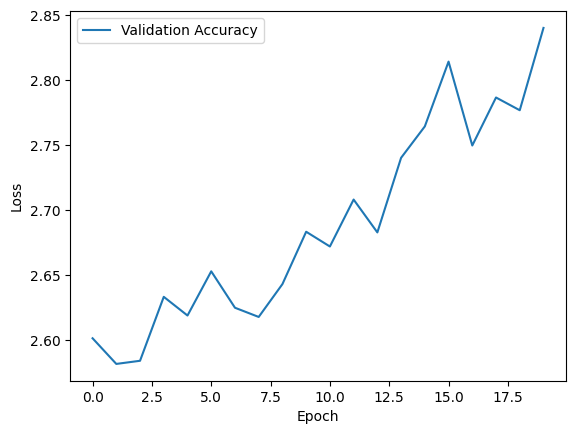

In [ ]:
import matplotlib.pyplot as plt
plt.plot(val_loss_lm, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

In [ ]:
pip install --upgrade sympy

In [ ]:
# import torch
# from data_loader import load_data
# from sklearn.model_selection import train_test_split
from nn_models import *
import random
# from torch.utils.data import TensorDataset
# def set_seed(seed=123):
#     random.seed(seed)                        # Python built-in random module
#     np.random.seed(seed)                     # NumPy
#     torch.manual_seed(seed)                  # PyTorch CPU
#     torch.cuda.manual_seed(seed)             # PyTorch GPU
#     torch.cuda.manual_seed_all(seed)         # All GPUs (if using multi-GPU)
#     torch.backends.cudnn.deterministic = True  # Makes results reproducible
#     torch.backends.cudnn.benchmark = False     # Slower, but deterministic

# # Call it once
# set_seed(123)
import os
# Check device availability
save_path = "./saved_models_cnn/"
if not os.path.exists(save_path):
    os.makedirs(save_path)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Specify parameters (information can be found in the readme file)
id_bytes = 4
label_bytes = 4
num_train_files = 1
num_train_images = 50000
width = 64
height = 64
depth = 3
num_classes = 10

# Load training and test data
train_images, train_labels = load_data('data_batch_1.bin', id_bytes, label_bytes, num_train_images,
                                        height, width, depth)

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

norm_train_images = normalize(train_images)
norm_val_images = normalize(val_images)

# initialize a Dataset object for each dataset
dataset_train = TensorDataset(norm_train_images, train_labels)
dataset_val = TensorDataset(norm_val_images, val_labels)

# initialize a model
model = VanillaCNN()
epochs = 30
batch_size = 128
learning_rate = 0.001

# train the model
model, best_model_save_path, device, train_acc_cnn, val_acc_cnn, train_loss_cnn, val_loss_cnn = training_loop(
    model=model,
    dataset_train=dataset_train,
    dataset_val=dataset_val,
    epochs=epochs,
    batch_size=batch_size,
    lr=learning_rate,
    save_path="saved_models_cnn/",
    model_name_str='Vanilla',  # you should change this to the specific model name you are training
    device=device)
plt.plot(val_loss_cnn)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

Training model:  Vanilla


  0%|          | 0/30 [00:00<?, ?it/s]

-------------------- Begin Epoch 0 --------------------



  8%|▊         | 28/352 [00:02<00:16, 19.33it/s]

Epoch 0, Batch 20: New best val acc 0.269, model weights saved to saved_models_cnn/E0B20_Vanilla.pt



 14%|█▍        | 51/352 [00:03<00:11, 25.97it/s]

Epoch 0, Batch 40: New best val acc 0.324, model weights saved to saved_models_cnn/E0B40_Vanilla.pt



 19%|█▉        | 68/352 [00:03<00:11, 25.55it/s]

Epoch 0, Batch 60: New best val acc 0.359, model weights saved to saved_models_cnn/E0B60_Vanilla.pt



 24%|██▍       | 86/352 [00:04<00:11, 22.22it/s]

Epoch 0, Batch 80: New best val acc 0.366, model weights saved to saved_models_cnn/E0B80_Vanilla.pt



 31%|███       | 109/352 [00:05<00:09, 25.90it/s]

Epoch 0, Batch 100: New best val acc 0.406, model weights saved to saved_models_cnn/E0B100_Vanilla.pt



 36%|███▌      | 127/352 [00:05<00:08, 25.82it/s]

Epoch 0, Batch 120: New best val acc 0.413, model weights saved to saved_models_cnn/E0B120_Vanilla.pt



 43%|████▎     | 151/352 [00:06<00:07, 28.64it/s]

Epoch 0, Batch 140: New best val acc 0.416, model weights saved to saved_models_cnn/E0B140_Vanilla.pt



 48%|████▊     | 168/352 [00:07<00:06, 27.03it/s]

Epoch 0, Batch 160: New best val acc 0.431, model weights saved to saved_models_cnn/E0B160_Vanilla.pt



 55%|█████▍    | 192/352 [00:08<00:05, 29.00it/s]

Epoch 0, Batch 180: New best val acc 0.434, model weights saved to saved_models_cnn/E0B180_Vanilla.pt



 59%|█████▉    | 209/352 [00:08<00:05, 27.23it/s]

Epoch 0, Batch 200: New best val acc 0.461, model weights saved to saved_models_cnn/E0B200_Vanilla.pt



 88%|████████▊ | 309/352 [00:12<00:01, 27.53it/s]

Epoch 0, Batch 300: New best val acc 0.483, model weights saved to saved_models_cnn/E0B300_Vanilla.pt



100%|██████████| 352/352 [00:13<00:00, 25.56it/s]

Epoch 0, Batch 340: New best val acc 0.490, model weights saved to saved_models_cnn/E0B340_Vanilla.pt



  3%|▎         | 1/30 [00:13<06:39, 13.78s/it]

End of Epoch 0: train loss 1.697, val loss 1.620; train acc 0.389, val acc 0.420
Current total training time: 13.784 seconds; time for this epoch: 13.780 seconds
-------------------------------------------------------
-------------------- Begin Epoch 1 --------------------



  9%|▉         | 32/352 [00:00<00:10, 31.30it/s]

Epoch 1, Batch 20: New best val acc 0.486, model weights saved to saved_models_cnn/E1B20_Vanilla.pt



 14%|█▍        | 50/352 [00:01<00:10, 28.23it/s]

Epoch 1, Batch 40: New best val acc 0.501, model weights saved to saved_models_cnn/E1B40_Vanilla.pt



 26%|██▌       | 91/352 [00:03<00:09, 27.41it/s]

Epoch 1, Batch 80: New best val acc 0.510, model weights saved to saved_models_cnn/E1B80_Vanilla.pt



 31%|███       | 108/352 [00:03<00:09, 25.18it/s]

Epoch 1, Batch 100: New best val acc 0.518, model weights saved to saved_models_cnn/E1B100_Vanilla.pt



 49%|████▉     | 172/352 [00:06<00:06, 28.81it/s]

Epoch 1, Batch 160: New best val acc 0.526, model weights saved to saved_models_cnn/E1B160_Vanilla.pt



 54%|█████▎    | 189/352 [00:06<00:05, 27.20it/s]

Epoch 1, Batch 180: New best val acc 0.529, model weights saved to saved_models_cnn/E1B180_Vanilla.pt



 82%|████████▏ | 289/352 [00:10<00:02, 27.54it/s]

Epoch 1, Batch 280: New best val acc 0.530, model weights saved to saved_models_cnn/E1B280_Vanilla.pt



 87%|████████▋ | 307/352 [00:10<00:01, 26.73it/s]

Epoch 1, Batch 300: New best val acc 0.539, model weights saved to saved_models_cnn/E1B300_Vanilla.pt



  7%|▋         | 2/30 [00:26<06:02, 12.96s/it]

End of Epoch 1: train loss 1.413, val loss 1.360; train acc 0.493, val acc 0.518
Current total training time: 26.172 seconds; time for this epoch: 12.387 seconds
-------------------------------------------------------
-------------------- Begin Epoch 2 --------------------



  9%|▉         | 32/352 [00:00<00:10, 31.44it/s]

Epoch 2, Batch 20: New best val acc 0.542, model weights saved to saved_models_cnn/E2B20_Vanilla.pt



 19%|█▉        | 67/352 [00:02<00:10, 26.36it/s]

Epoch 2, Batch 60: New best val acc 0.547, model weights saved to saved_models_cnn/E2B60_Vanilla.pt



 26%|██▌       | 91/352 [00:03<00:09, 27.78it/s]

Epoch 2, Batch 80: New best val acc 0.548, model weights saved to saved_models_cnn/E2B80_Vanilla.pt



 38%|███▊      | 132/352 [00:04<00:07, 27.66it/s]

Epoch 2, Batch 120: New best val acc 0.552, model weights saved to saved_models_cnn/E2B120_Vanilla.pt



 71%|███████   | 249/352 [00:08<00:03, 27.45it/s]

Epoch 2, Batch 240: New best val acc 0.555, model weights saved to saved_models_cnn/E2B240_Vanilla.pt



 83%|████████▎ | 291/352 [00:10<00:02, 29.05it/s]

Epoch 2, Batch 280: New best val acc 0.555, model weights saved to saved_models_cnn/E2B280_Vanilla.pt



 94%|█████████▍| 332/352 [00:11<00:00, 28.99it/s]

Epoch 2, Batch 320: New best val acc 0.558, model weights saved to saved_models_cnn/E2B320_Vanilla.pt



 10%|█         | 3/30 [00:38<05:41, 12.64s/it]

End of Epoch 2: train loss 1.294, val loss 1.274; train acc 0.539, val acc 0.546
Current total training time: 38.436 seconds; time for this epoch: 12.263 seconds
-------------------------------------------------------
-------------------- Begin Epoch 3 --------------------



  9%|▉         | 32/352 [00:00<00:10, 31.15it/s]

Epoch 3, Batch 20: New best val acc 0.553, model weights saved to saved_models_cnn/E3B20_Vanilla.pt



 14%|█▍        | 50/352 [00:01<00:10, 28.10it/s]

Epoch 3, Batch 40: New best val acc 0.557, model weights saved to saved_models_cnn/E3B40_Vanilla.pt



 19%|█▉        | 67/352 [00:02<00:10, 26.19it/s]

Epoch 3, Batch 60: New best val acc 0.569, model weights saved to saved_models_cnn/E3B60_Vanilla.pt



 59%|█████▉    | 208/352 [00:07<00:05, 28.37it/s]

Epoch 3, Batch 200: New best val acc 0.570, model weights saved to saved_models_cnn/E3B200_Vanilla.pt



 71%|███████   | 249/352 [00:08<00:03, 27.54it/s]

Epoch 3, Batch 240: New best val acc 0.576, model weights saved to saved_models_cnn/E3B240_Vanilla.pt



 13%|█▎        | 4/30 [00:50<05:25, 12.51s/it]

Epoch 3, Batch 340: New best val acc 0.583, model weights saved to saved_models_cnn/E3B340_Vanilla.pt
End of Epoch 3: train loss 1.207, val loss 1.223; train acc 0.571, val acc 0.564
Current total training time: 50.741 seconds; time for this epoch: 12.304 seconds
-------------------------------------------------------
-------------------- Begin Epoch 4 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.29it/s]

Epoch 4, Batch 20: New best val acc 0.576, model weights saved to saved_models_cnn/E4B20_Vanilla.pt



 19%|█▉        | 66/352 [00:02<00:12, 23.28it/s]

Epoch 4, Batch 60: New best val acc 0.587, model weights saved to saved_models_cnn/E4B60_Vanilla.pt



 42%|████▏     | 147/352 [00:05<00:07, 26.21it/s]

Epoch 4, Batch 140: New best val acc 0.589, model weights saved to saved_models_cnn/E4B140_Vanilla.pt



 49%|████▊     | 171/352 [00:06<00:06, 28.35it/s]

Epoch 4, Batch 160: New best val acc 0.592, model weights saved to saved_models_cnn/E4B160_Vanilla.pt



 17%|█▋        | 5/30 [01:03<05:11, 12.47s/it]

End of Epoch 4: train loss 1.111, val loss 1.174; train acc 0.603, val acc 0.584
Current total training time: 63.135 seconds; time for this epoch: 12.394 seconds
-------------------------------------------------------
-------------------- Begin Epoch 5 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.58it/s]

Epoch 5, Batch 20: New best val acc 0.591, model weights saved to saved_models_cnn/E5B20_Vanilla.pt



 30%|███       | 107/352 [00:03<00:09, 26.09it/s]

Epoch 5, Batch 100: New best val acc 0.595, model weights saved to saved_models_cnn/E5B100_Vanilla.pt



 60%|██████    | 212/352 [00:07<00:04, 28.87it/s]

Epoch 5, Batch 200: New best val acc 0.597, model weights saved to saved_models_cnn/E5B200_Vanilla.pt



 20%|██        | 6/30 [01:15<04:57, 12.40s/it]

End of Epoch 5: train loss 1.028, val loss 1.157; train acc 0.629, val acc 0.591
Current total training time: 75.402 seconds; time for this epoch: 12.266 seconds
-------------------------------------------------------
-------------------- Begin Epoch 6 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.44it/s]

Epoch 6, Batch 20: New best val acc 0.601, model weights saved to saved_models_cnn/E6B20_Vanilla.pt



 25%|██▌       | 89/352 [00:03<00:10, 26.29it/s]

Epoch 6, Batch 80: New best val acc 0.602, model weights saved to saved_models_cnn/E6B80_Vanilla.pt



 30%|███       | 107/352 [00:03<00:09, 25.99it/s]

Epoch 6, Batch 100: New best val acc 0.604, model weights saved to saved_models_cnn/E6B100_Vanilla.pt



 70%|███████   | 247/352 [00:08<00:03, 27.09it/s]

Epoch 6, Batch 240: New best val acc 0.606, model weights saved to saved_models_cnn/E6B240_Vanilla.pt



 93%|█████████▎| 329/352 [00:11<00:00, 27.22it/s]

Epoch 6, Batch 320: New best val acc 0.607, model weights saved to saved_models_cnn/E6B320_Vanilla.pt



 23%|██▎       | 7/30 [01:27<04:44, 12.39s/it]

End of Epoch 6: train loss 0.949, val loss 1.152; train acc 0.657, val acc 0.598
Current total training time: 87.766 seconds; time for this epoch: 12.363 seconds
-------------------------------------------------------
-------------------- Begin Epoch 7 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.60it/s]

Epoch 7, Batch 20: New best val acc 0.599, model weights saved to saved_models_cnn/E7B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 26.26it/s]

Epoch 7, Batch 80: New best val acc 0.600, model weights saved to saved_models_cnn/E7B80_Vanilla.pt



 55%|█████▍    | 192/352 [00:06<00:05, 28.67it/s]

Epoch 7, Batch 180: New best val acc 0.605, model weights saved to saved_models_cnn/E7B180_Vanilla.pt



 27%|██▋       | 8/30 [01:40<04:32, 12.36s/it]

End of Epoch 7: train loss 0.870, val loss 1.173; train acc 0.684, val acc 0.597
Current total training time: 100.080 seconds; time for this epoch: 12.313 seconds
-------------------------------------------------------
-------------------- Begin Epoch 8 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.82it/s]

Epoch 8, Batch 20: New best val acc 0.607, model weights saved to saved_models_cnn/E8B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 26.25it/s]

Epoch 8, Batch 80: New best val acc 0.607, model weights saved to saved_models_cnn/E8B80_Vanilla.pt



 48%|████▊     | 168/352 [00:05<00:06, 26.77it/s]

Epoch 8, Batch 160: New best val acc 0.613, model weights saved to saved_models_cnn/E8B160_Vanilla.pt



 30%|███       | 9/30 [01:52<04:20, 12.38s/it]

End of Epoch 8: train loss 0.786, val loss 1.172; train acc 0.713, val acc 0.605
Current total training time: 112.500 seconds; time for this epoch: 12.419 seconds
-------------------------------------------------------
-------------------- Begin Epoch 9 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.61it/s]

Epoch 9, Batch 20: New best val acc 0.605, model weights saved to saved_models_cnn/E9B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.89it/s]

Epoch 9, Batch 80: New best val acc 0.608, model weights saved to saved_models_cnn/E9B80_Vanilla.pt



 33%|███▎      | 10/30 [02:04<04:07, 12.37s/it]

End of Epoch 9: train loss 0.711, val loss 1.215; train acc 0.739, val acc 0.604
Current total training time: 124.853 seconds; time for this epoch: 12.352 seconds
-------------------------------------------------------
-------------------- Begin Epoch 10 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.54it/s]

Epoch 10, Batch 20: New best val acc 0.607, model weights saved to saved_models_cnn/E10B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.44it/s]

Epoch 10, Batch 40: New best val acc 0.610, model weights saved to saved_models_cnn/E10B40_Vanilla.pt



100%|██████████| 352/352 [00:12<00:00, 28.57it/s]

Epoch 10, Batch 340: New best val acc 0.610, model weights saved to saved_models_cnn/E10B340_Vanilla.pt



 37%|███▋      | 11/30 [02:17<03:54, 12.36s/it]

End of Epoch 10: train loss 0.652, val loss 1.251; train acc 0.760, val acc 0.604
Current total training time: 137.188 seconds; time for this epoch: 12.335 seconds
-------------------------------------------------------
-------------------- Begin Epoch 11 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.70it/s]

Epoch 11, Batch 20: New best val acc 0.608, model weights saved to saved_models_cnn/E11B20_Vanilla.pt



 25%|██▌       | 89/352 [00:03<00:10, 26.25it/s]

Epoch 11, Batch 80: New best val acc 0.612, model weights saved to saved_models_cnn/E11B80_Vanilla.pt



 89%|████████▊ | 312/352 [00:10<00:01, 28.79it/s]

Epoch 11, Batch 300: New best val acc 0.613, model weights saved to saved_models_cnn/E11B300_Vanilla.pt



 40%|████      | 12/30 [02:29<03:42, 12.36s/it]

End of Epoch 11: train loss 0.588, val loss 1.302; train acc 0.781, val acc 0.607
Current total training time: 149.532 seconds; time for this epoch: 12.343 seconds
-------------------------------------------------------
-------------------- Begin Epoch 12 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.46it/s]

Epoch 12, Batch 20: New best val acc 0.595, model weights saved to saved_models_cnn/E12B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.49it/s]

Epoch 12, Batch 40: New best val acc 0.610, model weights saved to saved_models_cnn/E12B40_Vanilla.pt



 43%|████▎     | 13/30 [02:41<03:29, 12.35s/it]

End of Epoch 12: train loss 0.530, val loss 1.372; train acc 0.802, val acc 0.604
Current total training time: 161.870 seconds; time for this epoch: 12.337 seconds
-------------------------------------------------------
-------------------- Begin Epoch 13 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.42it/s]

Epoch 13, Batch 20: New best val acc 0.607, model weights saved to saved_models_cnn/E13B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.52it/s]

Epoch 13, Batch 40: New best val acc 0.611, model weights saved to saved_models_cnn/E13B40_Vanilla.pt



 48%|████▊     | 168/352 [00:05<00:06, 26.46it/s]

Epoch 13, Batch 160: New best val acc 0.612, model weights saved to saved_models_cnn/E13B160_Vanilla.pt



 47%|████▋     | 14/30 [02:54<03:17, 12.37s/it]

End of Epoch 13: train loss 0.482, val loss 1.436; train acc 0.819, val acc 0.606
Current total training time: 174.301 seconds; time for this epoch: 12.431 seconds
-------------------------------------------------------
-------------------- Begin Epoch 14 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.87it/s]

Epoch 14, Batch 20: New best val acc 0.609, model weights saved to saved_models_cnn/E14B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.57it/s]

Epoch 14, Batch 40: New best val acc 0.609, model weights saved to saved_models_cnn/E14B40_Vanilla.pt



 20%|██        | 71/352 [00:02<00:09, 28.78it/s]

Epoch 14, Batch 60: New best val acc 0.613, model weights saved to saved_models_cnn/E14B60_Vanilla.pt



 50%|█████     | 15/30 [03:06<03:05, 12.36s/it]

End of Epoch 14: train loss 0.444, val loss 1.515; train acc 0.834, val acc 0.605
Current total training time: 186.618 seconds; time for this epoch: 12.316 seconds
-------------------------------------------------------
-------------------- Begin Epoch 15 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.47it/s]

Epoch 15, Batch 20: New best val acc 0.612, model weights saved to saved_models_cnn/E15B20_Vanilla.pt



 53%|█████▎    | 16/30 [03:18<02:52, 12.36s/it]

End of Epoch 15: train loss 0.427, val loss 1.584; train acc 0.840, val acc 0.605
Current total training time: 198.971 seconds; time for this epoch: 12.353 seconds
-------------------------------------------------------
-------------------- Begin Epoch 16 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.44it/s]

Epoch 16, Batch 20: New best val acc 0.605, model weights saved to saved_models_cnn/E16B20_Vanilla.pt



 20%|██        | 71/352 [00:02<00:09, 28.60it/s]

Epoch 16, Batch 60: New best val acc 0.607, model weights saved to saved_models_cnn/E16B60_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.33it/s]

Epoch 16, Batch 80: New best val acc 0.610, model weights saved to saved_models_cnn/E16B80_Vanilla.pt



 30%|██▉       | 105/352 [00:03<00:11, 20.89it/s]


Epoch 16, Batch 100: New best val acc 0.610, model weights saved to saved_models_cnn/E16B100_Vanilla.pt


 57%|█████▋    | 17/30 [03:31<02:41, 12.43s/it]

End of Epoch 16: train loss 0.396, val loss 1.648; train acc 0.849, val acc 0.605
Current total training time: 211.587 seconds; time for this epoch: 12.616 seconds
-------------------------------------------------------
-------------------- Begin Epoch 17 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.58it/s]

Epoch 17, Batch 20: New best val acc 0.615, model weights saved to saved_models_cnn/E17B20_Vanilla.pt



 60%|██████    | 18/30 [03:43<02:29, 12.42s/it]

End of Epoch 17: train loss 0.362, val loss 1.729; train acc 0.862, val acc 0.603
Current total training time: 223.968 seconds; time for this epoch: 12.380 seconds
-------------------------------------------------------
-------------------- Begin Epoch 18 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.45it/s]

Epoch 18, Batch 20: New best val acc 0.597, model weights saved to saved_models_cnn/E18B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.45it/s]

Epoch 18, Batch 40: New best val acc 0.605, model weights saved to saved_models_cnn/E18B40_Vanilla.pt



 93%|█████████▎| 328/352 [00:11<00:00, 27.37it/s]

Epoch 18, Batch 320: New best val acc 0.613, model weights saved to saved_models_cnn/E18B320_Vanilla.pt



 63%|██████▎   | 19/30 [03:56<02:16, 12.41s/it]

End of Epoch 18: train loss 0.346, val loss 1.785; train acc 0.870, val acc 0.601
Current total training time: 236.360 seconds; time for this epoch: 12.392 seconds
-------------------------------------------------------
-------------------- Begin Epoch 19 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.37it/s]

Epoch 19, Batch 20: New best val acc 0.604, model weights saved to saved_models_cnn/E19B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.71it/s]

Epoch 19, Batch 80: New best val acc 0.607, model weights saved to saved_models_cnn/E19B80_Vanilla.pt



 30%|███       | 106/352 [00:03<00:11, 22.07it/s]

Epoch 19, Batch 100: New best val acc 0.610, model weights saved to saved_models_cnn/E19B100_Vanilla.pt



 67%|██████▋   | 20/30 [04:08<02:04, 12.42s/it]

End of Epoch 19: train loss 0.329, val loss 1.855; train acc 0.876, val acc 0.604
Current total training time: 248.811 seconds; time for this epoch: 12.449 seconds
-------------------------------------------------------
-------------------- Begin Epoch 20 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.26it/s]

Epoch 20, Batch 20: New best val acc 0.606, model weights saved to saved_models_cnn/E20B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.40it/s]

Epoch 20, Batch 40: New best val acc 0.607, model weights saved to saved_models_cnn/E20B40_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.72it/s]

Epoch 20, Batch 80: New best val acc 0.614, model weights saved to saved_models_cnn/E20B80_Vanilla.pt



 70%|███████   | 21/30 [04:21<01:51, 12.42s/it]

End of Epoch 20: train loss 0.314, val loss 1.937; train acc 0.883, val acc 0.605
Current total training time: 261.241 seconds; time for this epoch: 12.430 seconds
-------------------------------------------------------
-------------------- Begin Epoch 21 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.26it/s]

Epoch 21, Batch 20: New best val acc 0.605, model weights saved to saved_models_cnn/E21B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.21it/s]

Epoch 21, Batch 40: New best val acc 0.607, model weights saved to saved_models_cnn/E21B40_Vanilla.pt



 83%|████████▎ | 291/352 [00:10<00:02, 28.29it/s]

Epoch 21, Batch 280: New best val acc 0.608, model weights saved to saved_models_cnn/E21B280_Vanilla.pt



 99%|█████████▉| 348/352 [00:12<00:00, 26.46it/s]

Epoch 21, Batch 340: New best val acc 0.610, model weights saved to saved_models_cnn/E21B340_Vanilla.pt


 73%|███████▎  | 22/30 [04:33<01:39, 12.44s/it]

End of Epoch 21: train loss 0.297, val loss 1.970; train acc 0.887, val acc 0.603
Current total training time: 273.729 seconds; time for this epoch: 12.487 seconds
-------------------------------------------------------
-------------------- Begin Epoch 22 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.63it/s]

Epoch 22, Batch 20: New best val acc 0.600, model weights saved to saved_models_cnn/E22B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.65it/s]

Epoch 22, Batch 40: New best val acc 0.609, model weights saved to saved_models_cnn/E22B40_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.84it/s]

Epoch 22, Batch 80: New best val acc 0.613, model weights saved to saved_models_cnn/E22B80_Vanilla.pt



 77%|███████▋  | 23/30 [04:46<01:26, 12.42s/it]

End of Epoch 22: train loss 0.280, val loss 2.032; train acc 0.893, val acc 0.605
Current total training time: 286.093 seconds; time for this epoch: 12.364 seconds
-------------------------------------------------------
-------------------- Begin Epoch 23 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.62it/s]

Epoch 23, Batch 20: New best val acc 0.606, model weights saved to saved_models_cnn/E23B20_Vanilla.pt



 20%|██        | 71/352 [00:02<00:09, 28.89it/s]

Epoch 23, Batch 60: New best val acc 0.606, model weights saved to saved_models_cnn/E23B60_Vanilla.pt



 48%|████▊     | 168/352 [00:05<00:06, 26.82it/s]

Epoch 23, Batch 160: New best val acc 0.610, model weights saved to saved_models_cnn/E23B160_Vanilla.pt



 80%|████████  | 24/30 [04:58<01:14, 12.39s/it]

End of Epoch 23: train loss 0.277, val loss 2.085; train acc 0.894, val acc 0.604
Current total training time: 298.422 seconds; time for this epoch: 12.328 seconds
-------------------------------------------------------
-------------------- Begin Epoch 24 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.45it/s]

Epoch 24, Batch 20: New best val acc 0.604, model weights saved to saved_models_cnn/E24B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.29it/s]

Epoch 24, Batch 40: New best val acc 0.608, model weights saved to saved_models_cnn/E24B40_Vanilla.pt



 20%|██        | 71/352 [00:02<00:09, 28.83it/s]

Epoch 24, Batch 60: New best val acc 0.608, model weights saved to saved_models_cnn/E24B60_Vanilla.pt



 36%|███▋      | 128/352 [00:04<00:08, 25.28it/s]

Epoch 24, Batch 120: New best val acc 0.608, model weights saved to saved_models_cnn/E24B120_Vanilla.pt



 83%|████████▎ | 292/352 [00:10<00:02, 28.52it/s]

Epoch 24, Batch 280: New best val acc 0.611, model weights saved to saved_models_cnn/E24B280_Vanilla.pt



 93%|█████████▎| 327/352 [00:11<00:00, 26.85it/s]

Epoch 24, Batch 320: New best val acc 0.614, model weights saved to saved_models_cnn/E24B320_Vanilla.pt



 83%|████████▎ | 25/30 [05:10<01:02, 12.41s/it]

End of Epoch 24: train loss 0.264, val loss 2.124; train acc 0.900, val acc 0.605
Current total training time: 310.873 seconds; time for this epoch: 12.450 seconds
-------------------------------------------------------
-------------------- Begin Epoch 25 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.51it/s]

Epoch 25, Batch 20: New best val acc 0.605, model weights saved to saved_models_cnn/E25B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 25.81it/s]

Epoch 25, Batch 80: New best val acc 0.607, model weights saved to saved_models_cnn/E25B80_Vanilla.pt



 36%|███▋      | 128/352 [00:04<00:08, 25.21it/s]

Epoch 25, Batch 120: New best val acc 0.609, model weights saved to saved_models_cnn/E25B120_Vanilla.pt



 88%|████████▊ | 309/352 [00:11<00:01, 26.70it/s]

Epoch 25, Batch 300: New best val acc 0.609, model weights saved to saved_models_cnn/E25B300_Vanilla.pt



 87%|████████▋ | 26/30 [05:23<00:49, 12.43s/it]

End of Epoch 25: train loss 0.261, val loss 2.181; train acc 0.902, val acc 0.604
Current total training time: 323.364 seconds; time for this epoch: 12.490 seconds
-------------------------------------------------------
-------------------- Begin Epoch 26 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.59it/s]

Epoch 26, Batch 20: New best val acc 0.603, model weights saved to saved_models_cnn/E26B20_Vanilla.pt



 13%|█▎        | 47/352 [00:01<00:11, 27.17it/s]

Epoch 26, Batch 40: New best val acc 0.608, model weights saved to saved_models_cnn/E26B40_Vanilla.pt



 90%|█████████ | 27/30 [05:35<00:37, 12.44s/it]

End of Epoch 26: train loss 0.248, val loss 2.234; train acc 0.906, val acc 0.601
Current total training time: 335.822 seconds; time for this epoch: 12.457 seconds
-------------------------------------------------------
-------------------- Begin Epoch 27 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.52it/s]

Epoch 27, Batch 20: New best val acc 0.600, model weights saved to saved_models_cnn/E27B20_Vanilla.pt



 20%|██        | 71/352 [00:02<00:09, 28.83it/s]

Epoch 27, Batch 60: New best val acc 0.604, model weights saved to saved_models_cnn/E27B60_Vanilla.pt



 43%|████▎     | 151/352 [00:05<00:07, 26.51it/s]

Epoch 27, Batch 140: New best val acc 0.609, model weights saved to saved_models_cnn/E27B140_Vanilla.pt



 93%|█████████▎| 28/30 [05:48<00:24, 12.43s/it]

End of Epoch 27: train loss 0.247, val loss 2.257; train acc 0.907, val acc 0.602
Current total training time: 348.227 seconds; time for this epoch: 12.404 seconds
-------------------------------------------------------
-------------------- Begin Epoch 28 --------------------



  9%|▊         | 30/352 [00:00<00:10, 30.06it/s]

Epoch 28, Batch 20: New best val acc 0.603, model weights saved to saved_models_cnn/E28B20_Vanilla.pt



 25%|██▌       | 88/352 [00:03<00:10, 26.08it/s]

Epoch 28, Batch 80: New best val acc 0.606, model weights saved to saved_models_cnn/E28B80_Vanilla.pt



 43%|████▎     | 151/352 [00:05<00:07, 26.28it/s]

Epoch 28, Batch 140: New best val acc 0.609, model weights saved to saved_models_cnn/E28B140_Vanilla.pt



 48%|████▊     | 168/352 [00:06<00:07, 26.24it/s]

Epoch 28, Batch 160: New best val acc 0.609, model weights saved to saved_models_cnn/E28B160_Vanilla.pt



 97%|█████████▋| 29/30 [06:00<00:12, 12.45s/it]

End of Epoch 28: train loss 0.241, val loss 2.311; train acc 0.909, val acc 0.604
Current total training time: 360.726 seconds; time for this epoch: 12.498 seconds
-------------------------------------------------------
-------------------- Begin Epoch 29 --------------------



  9%|▉         | 31/352 [00:00<00:10, 30.58it/s]

Epoch 29, Batch 20: New best val acc 0.609, model weights saved to saved_models_cnn/E29B20_Vanilla.pt



 25%|██▌       | 89/352 [00:03<00:10, 25.96it/s]

Epoch 29, Batch 80: New best val acc 0.609, model weights saved to saved_models_cnn/E29B80_Vanilla.pt



100%|██████████| 30/30 [06:13<00:00, 12.44s/it]

End of Epoch 29: train loss 0.236, val loss 2.362; train acc 0.911, val acc 0.603
Current total training time: 373.092 seconds; time for this epoch: 12.365 seconds
-------------------------------------------------------


NameError: name 'plt' is not defined

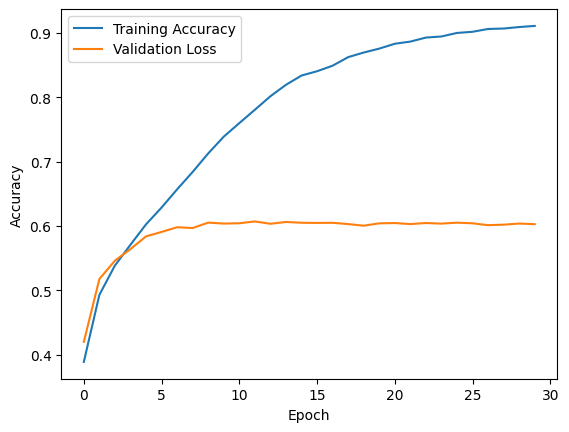

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_acc_cnn, label='Training Accuracy')
plt.plot(val_acc_cnn, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

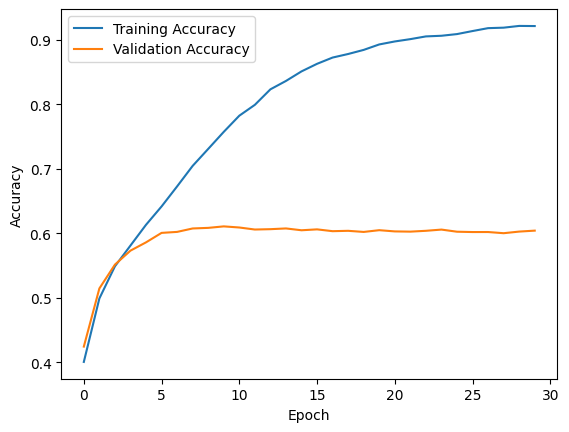

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

In [ ]:
from tuned_nn_models import *
import random
def set_seed(seed=123):
    random.seed(seed)                        # Python built-in random module
    np.random.seed(seed)                     # NumPy
    torch.manual_seed(seed)                  # PyTorch CPU
    torch.cuda.manual_seed(seed)             # PyTorch GPU
    torch.cuda.manual_seed_all(seed)         # All GPUs (if using multi-GPU)
    torch.backends.cudnn.deterministic = True  # Makes results reproducible
    torch.backends.cudnn.benchmark = False     # Slower, but deterministic

# Call it once before training
set_seed(123)

save_path = "./saved_models_cnn_tuned/"
if not os.path.exists(save_path):
  os.makedirs(save_path)

# Check device availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Specify parameters (information can be found in the readme file)
id_bytes = 4
label_bytes = 4
num_train_files = 1
num_train_images = 50000
width = 64
height = 64
depth = 3
num_classes = 10

# Load training and test data
train_images, train_labels = load_data('data_batch_1.bin', id_bytes, label_bytes, num_train_images,
                                      height, width, depth)

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

norm_train_images = normalize(train_images)
norm_val_images = normalize(val_images)

# initialize a Dataset object for each dataset
dataset_train = TensorDataset(norm_train_images, train_labels)
dataset_val = TensorDataset(norm_val_images, val_labels)

# initialize a model
model = VanillaCNN()
epochs = 30
batch_size = 128
learning_rate = 0.01

# train the model
model, best_model_save_path, device, train_acc_tuned, val_acc_tuned, train_loss_tuned, val_loss_tuned = training_loop(
    model=model,
    dataset_train=dataset_train,
    dataset_val=dataset_val,
    epochs=epochs,
    batch_size=batch_size,
    lr=learning_rate,
    save_path="saved_models_cnn_tuned/",
    model_name_str='Vanilla_tuned',  # you should change this to the specific model name you are training
    device=device)



Training model:  Vanilla_tuned


  0%|          | 0/30 [00:00<?, ?it/s]

-------------------- Begin Epoch 0 --------------------



  8%|▊         | 28/352 [00:01<00:14, 21.64it/s]

Epoch 0, Batch 20: New best val acc 0.148, model weights saved to saved_models_cnn_tuned/E0B20_Vanilla_tuned.pt



 19%|█▉        | 66/352 [00:02<00:13, 21.67it/s]

Epoch 0, Batch 60: New best val acc 0.179, model weights saved to saved_models_cnn_tuned/E0B60_Vanilla_tuned.pt



 24%|██▍       | 86/352 [00:03<00:12, 22.02it/s]

Epoch 0, Batch 80: New best val acc 0.202, model weights saved to saved_models_cnn_tuned/E0B80_Vanilla_tuned.pt



 30%|███       | 106/352 [00:04<00:11, 22.21it/s]

Epoch 0, Batch 100: New best val acc 0.213, model weights saved to saved_models_cnn_tuned/E0B100_Vanilla_tuned.pt



 47%|████▋     | 166/352 [00:07<00:08, 21.40it/s]

Epoch 0, Batch 160: New best val acc 0.223, model weights saved to saved_models_cnn_tuned/E0B160_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 22.23it/s]

Epoch 0, Batch 220: New best val acc 0.248, model weights saved to saved_models_cnn_tuned/E0B220_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.39it/s]

Epoch 0, Batch 260: New best val acc 0.254, model weights saved to saved_models_cnn_tuned/E0B260_Vanilla_tuned.pt



 81%|████████▏ | 286/352 [00:12<00:02, 22.32it/s]

Epoch 0, Batch 280: New best val acc 0.254, model weights saved to saved_models_cnn_tuned/E0B280_Vanilla_tuned.pt



 93%|█████████▎| 326/352 [00:14<00:01, 22.19it/s]

Epoch 0, Batch 320: New best val acc 0.269, model weights saved to saved_models_cnn_tuned/E0B320_Vanilla_tuned.pt



 98%|█████████▊| 346/352 [00:14<00:00, 22.20it/s]

Epoch 0, Batch 340: New best val acc 0.285, model weights saved to saved_models_cnn_tuned/E0B340_Vanilla_tuned.pt



  3%|▎         | 1/30 [00:15<07:18, 15.12s/it]

End of Epoch 0: train loss 2.765, val loss 2.132; train acc 0.189, val acc 0.220
Current total training time: 15.122 seconds; time for this epoch: 15.118 seconds
-------------------------------------------------------
-------------------- Begin Epoch 1 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.45it/s]

Epoch 1, Batch 20: New best val acc 0.199, model weights saved to saved_models_cnn_tuned/E1B20_Vanilla_tuned.pt



 13%|█▎        | 47/352 [00:02<00:17, 17.80it/s]

Epoch 1, Batch 40: New best val acc 0.320, model weights saved to saved_models_cnn_tuned/E1B40_Vanilla_tuned.pt



 19%|█▉        | 66/352 [00:02<00:14, 19.78it/s]

Epoch 1, Batch 60: New best val acc 0.321, model weights saved to saved_models_cnn_tuned/E1B60_Vanilla_tuned.pt



 24%|██▍       | 86/352 [00:03<00:12, 21.08it/s]

Epoch 1, Batch 80: New best val acc 0.321, model weights saved to saved_models_cnn_tuned/E1B80_Vanilla_tuned.pt



 30%|███       | 106/352 [00:04<00:11, 21.03it/s]

Epoch 1, Batch 100: New best val acc 0.370, model weights saved to saved_models_cnn_tuned/E1B100_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.25it/s]

Epoch 1, Batch 260: New best val acc 0.392, model weights saved to saved_models_cnn_tuned/E1B260_Vanilla_tuned.pt



 98%|█████████▊| 346/352 [00:15<00:00, 21.86it/s]

Epoch 1, Batch 340: New best val acc 0.393, model weights saved to saved_models_cnn_tuned/E1B340_Vanilla_tuned.pt



  7%|▋         | 2/30 [00:30<07:04, 15.15s/it]

End of Epoch 1: train loss 1.885, val loss 1.833; train acc 0.324, val acc 0.351
Current total training time: 30.301 seconds; time for this epoch: 15.179 seconds
-------------------------------------------------------
-------------------- Begin Epoch 2 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.61it/s]

Epoch 2, Batch 20: New best val acc 0.409, model weights saved to saved_models_cnn_tuned/E2B20_Vanilla_tuned.pt



 47%|████▋     | 166/352 [00:07<00:08, 22.24it/s]

Epoch 2, Batch 160: New best val acc 0.414, model weights saved to saved_models_cnn_tuned/E2B160_Vanilla_tuned.pt



 53%|█████▎    | 186/352 [00:08<00:07, 22.31it/s]

Epoch 2, Batch 180: New best val acc 0.425, model weights saved to saved_models_cnn_tuned/E2B180_Vanilla_tuned.pt



 70%|██████▉   | 246/352 [00:10<00:04, 22.28it/s]

Epoch 2, Batch 240: New best val acc 0.429, model weights saved to saved_models_cnn_tuned/E2B240_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.35it/s]

Epoch 2, Batch 260: New best val acc 0.429, model weights saved to saved_models_cnn_tuned/E2B260_Vanilla_tuned.pt



 10%|█         | 3/30 [00:45<06:49, 15.17s/it]

End of Epoch 2: train loss 1.703, val loss 1.666; train acc 0.388, val acc 0.403
Current total training time: 45.489 seconds; time for this epoch: 15.187 seconds
-------------------------------------------------------
-------------------- Begin Epoch 3 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.30it/s]

Epoch 3, Batch 20: New best val acc 0.431, model weights saved to saved_models_cnn_tuned/E3B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.57it/s]

Epoch 3, Batch 40: New best val acc 0.444, model weights saved to saved_models_cnn_tuned/E3B40_Vanilla_tuned.pt



 30%|███       | 107/352 [00:04<00:11, 21.82it/s]

Epoch 3, Batch 100: New best val acc 0.447, model weights saved to saved_models_cnn_tuned/E3B100_Vanilla_tuned.pt



 41%|████▏     | 146/352 [00:06<00:09, 22.19it/s]

Epoch 3, Batch 140: New best val acc 0.448, model weights saved to saved_models_cnn_tuned/E3B140_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 21.55it/s]

Epoch 3, Batch 220: New best val acc 0.449, model weights saved to saved_models_cnn_tuned/E3B220_Vanilla_tuned.pt



 93%|█████████▎| 326/352 [00:13<00:01, 22.29it/s]

Epoch 3, Batch 320: New best val acc 0.461, model weights saved to saved_models_cnn_tuned/E3B320_Vanilla_tuned.pt



 98%|█████████▊| 346/352 [00:14<00:00, 22.19it/s]

Epoch 3, Batch 340: New best val acc 0.463, model weights saved to saved_models_cnn_tuned/E3B340_Vanilla_tuned.pt



 13%|█▎        | 4/30 [01:00<06:31, 15.06s/it]

End of Epoch 3: train loss 1.606, val loss 1.570; train acc 0.422, val acc 0.440
Current total training time: 60.384 seconds; time for this epoch: 14.894 seconds
-------------------------------------------------------
-------------------- Begin Epoch 4 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.43it/s]

Epoch 4, Batch 20: New best val acc 0.426, model weights saved to saved_models_cnn_tuned/E4B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.61it/s]

Epoch 4, Batch 40: New best val acc 0.464, model weights saved to saved_models_cnn_tuned/E4B40_Vanilla_tuned.pt



 30%|███       | 107/352 [00:04<00:11, 21.46it/s]

Epoch 4, Batch 100: New best val acc 0.473, model weights saved to saved_models_cnn_tuned/E4B100_Vanilla_tuned.pt



 36%|███▌      | 126/352 [00:05<00:10, 21.55it/s]

Epoch 4, Batch 120: New best val acc 0.485, model weights saved to saved_models_cnn_tuned/E4B120_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.33it/s]

Epoch 4, Batch 260: New best val acc 0.494, model weights saved to saved_models_cnn_tuned/E4B260_Vanilla_tuned.pt



 98%|█████████▊| 346/352 [00:14<00:00, 22.45it/s]

Epoch 4, Batch 340: New best val acc 0.496, model weights saved to saved_models_cnn_tuned/E4B340_Vanilla_tuned.pt



 17%|█▋        | 5/30 [01:15<06:14, 14.98s/it]

End of Epoch 4: train loss 1.530, val loss 1.493; train acc 0.450, val acc 0.466
Current total training time: 75.212 seconds; time for this epoch: 14.828 seconds
-------------------------------------------------------
-------------------- Begin Epoch 5 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.48it/s]

Epoch 5, Batch 20: New best val acc 0.491, model weights saved to saved_models_cnn_tuned/E5B20_Vanilla_tuned.pt



 31%|███       | 108/352 [00:04<00:11, 21.27it/s]

Epoch 5, Batch 100: New best val acc 0.499, model weights saved to saved_models_cnn_tuned/E5B100_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.37it/s]

Epoch 5, Batch 260: New best val acc 0.511, model weights saved to saved_models_cnn_tuned/E5B260_Vanilla_tuned.pt



 20%|██        | 6/30 [01:29<05:57, 14.90s/it]

End of Epoch 5: train loss 1.471, val loss 1.468; train acc 0.470, val acc 0.481
Current total training time: 89.949 seconds; time for this epoch: 14.736 seconds
-------------------------------------------------------
-------------------- Begin Epoch 6 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.37it/s]

Epoch 6, Batch 20: New best val acc 0.514, model weights saved to saved_models_cnn_tuned/E6B20_Vanilla_tuned.pt



 53%|█████▎    | 186/352 [00:07<00:07, 22.32it/s]

Epoch 6, Batch 180: New best val acc 0.515, model weights saved to saved_models_cnn_tuned/E6B180_Vanilla_tuned.pt



 81%|████████▏ | 286/352 [00:12<00:02, 22.22it/s]

Epoch 6, Batch 280: New best val acc 0.521, model weights saved to saved_models_cnn_tuned/E6B280_Vanilla_tuned.pt



 87%|████████▋ | 306/352 [00:12<00:02, 22.20it/s]

Epoch 6, Batch 300: New best val acc 0.524, model weights saved to saved_models_cnn_tuned/E6B300_Vanilla_tuned.pt



 23%|██▎       | 7/30 [01:44<05:42, 14.87s/it]

End of Epoch 6: train loss 1.417, val loss 1.415; train acc 0.489, val acc 0.502
Current total training time: 104.766 seconds; time for this epoch: 14.816 seconds
-------------------------------------------------------
-------------------- Begin Epoch 7 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.49it/s]

Epoch 7, Batch 20: New best val acc 0.512, model weights saved to saved_models_cnn_tuned/E7B20_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 21.87it/s]

Epoch 7, Batch 60: New best val acc 0.514, model weights saved to saved_models_cnn_tuned/E7B60_Vanilla_tuned.pt



 41%|████▏     | 146/352 [00:06<00:09, 22.03it/s]

Epoch 7, Batch 140: New best val acc 0.527, model weights saved to saved_models_cnn_tuned/E7B140_Vanilla_tuned.pt



 70%|██████▉   | 246/352 [00:10<00:04, 22.18it/s]

Epoch 7, Batch 240: New best val acc 0.529, model weights saved to saved_models_cnn_tuned/E7B240_Vanilla_tuned.pt



 27%|██▋       | 8/30 [01:59<05:27, 14.88s/it]

End of Epoch 7: train loss 1.365, val loss 1.394; train acc 0.509, val acc 0.509
Current total training time: 119.664 seconds; time for this epoch: 14.897 seconds
-------------------------------------------------------
-------------------- Begin Epoch 8 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.31it/s]

Epoch 8, Batch 20: New best val acc 0.529, model weights saved to saved_models_cnn_tuned/E8B20_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 22.01it/s]

Epoch 8, Batch 60: New best val acc 0.535, model weights saved to saved_models_cnn_tuned/E8B60_Vanilla_tuned.pt



 47%|████▋     | 166/352 [00:06<00:08, 22.26it/s]

Epoch 8, Batch 160: New best val acc 0.536, model weights saved to saved_models_cnn_tuned/E8B160_Vanilla_tuned.pt



 87%|████████▋ | 306/352 [00:12<00:02, 22.14it/s]

Epoch 8, Batch 300: New best val acc 0.546, model weights saved to saved_models_cnn_tuned/E8B300_Vanilla_tuned.pt



 30%|███       | 9/30 [02:14<05:12, 14.86s/it]

End of Epoch 8: train loss 1.316, val loss 1.363; train acc 0.526, val acc 0.522
Current total training time: 134.497 seconds; time for this epoch: 14.833 seconds
-------------------------------------------------------
-------------------- Begin Epoch 9 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.58it/s]

Epoch 9, Batch 20: New best val acc 0.544, model weights saved to saved_models_cnn_tuned/E9B20_Vanilla_tuned.pt



 36%|███▌      | 126/352 [00:05<00:10, 21.87it/s]

Epoch 9, Batch 120: New best val acc 0.549, model weights saved to saved_models_cnn_tuned/E9B120_Vanilla_tuned.pt



 59%|█████▊    | 206/352 [00:08<00:06, 21.02it/s]

Epoch 9, Batch 200: New best val acc 0.554, model weights saved to saved_models_cnn_tuned/E9B200_Vanilla_tuned.pt



 33%|███▎      | 10/30 [02:29<04:56, 14.84s/it]

End of Epoch 9: train loss 1.272, val loss 1.333; train acc 0.546, val acc 0.533
Current total training time: 149.278 seconds; time for this epoch: 14.781 seconds
-------------------------------------------------------
-------------------- Begin Epoch 10 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.39it/s]

Epoch 10, Batch 20: New best val acc 0.537, model weights saved to saved_models_cnn_tuned/E10B20_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 22.06it/s]

Epoch 10, Batch 60: New best val acc 0.540, model weights saved to saved_models_cnn_tuned/E10B60_Vanilla_tuned.pt



 30%|███       | 107/352 [00:04<00:11, 20.84it/s]

Epoch 10, Batch 100: New best val acc 0.559, model weights saved to saved_models_cnn_tuned/E10B100_Vanilla_tuned.pt



 70%|██████▉   | 246/352 [00:10<00:04, 22.47it/s]

Epoch 10, Batch 240: New best val acc 0.561, model weights saved to saved_models_cnn_tuned/E10B240_Vanilla_tuned.pt



 81%|████████▏ | 286/352 [00:12<00:02, 22.35it/s]

Epoch 10, Batch 280: New best val acc 0.563, model weights saved to saved_models_cnn_tuned/E10B280_Vanilla_tuned.pt



 37%|███▋      | 11/30 [02:44<04:41, 14.84s/it]

End of Epoch 10: train loss 1.222, val loss 1.307; train acc 0.561, val acc 0.544
Current total training time: 164.106 seconds; time for this epoch: 14.828 seconds
-------------------------------------------------------
-------------------- Begin Epoch 11 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.40it/s]

Epoch 11, Batch 20: New best val acc 0.505, model weights saved to saved_models_cnn_tuned/E11B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.61it/s]

Epoch 11, Batch 40: New best val acc 0.565, model weights saved to saved_models_cnn_tuned/E11B40_Vanilla_tuned.pt



 40%|████      | 12/30 [02:58<04:26, 14.83s/it]

End of Epoch 11: train loss 1.187, val loss 1.305; train acc 0.576, val acc 0.545
Current total training time: 178.925 seconds; time for this epoch: 14.819 seconds
-------------------------------------------------------
-------------------- Begin Epoch 12 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.32it/s]

Epoch 12, Batch 20: New best val acc 0.555, model weights saved to saved_models_cnn_tuned/E12B20_Vanilla_tuned.pt



 14%|█▍        | 49/352 [00:01<00:14, 21.30it/s]

Epoch 12, Batch 40: New best val acc 0.564, model weights saved to saved_models_cnn_tuned/E12B40_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 22.33it/s]

Epoch 12, Batch 220: New best val acc 0.565, model weights saved to saved_models_cnn_tuned/E12B220_Vanilla_tuned.pt



 43%|████▎     | 13/30 [03:13<04:12, 14.84s/it]

End of Epoch 12: train loss 1.146, val loss 1.315; train acc 0.590, val acc 0.545
Current total training time: 193.785 seconds; time for this epoch: 14.859 seconds
-------------------------------------------------------
-------------------- Begin Epoch 13 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.31it/s]

Epoch 13, Batch 20: New best val acc 0.558, model weights saved to saved_models_cnn_tuned/E13B20_Vanilla_tuned.pt



 25%|██▌       | 88/352 [00:03<00:12, 21.81it/s]

Epoch 13, Batch 80: New best val acc 0.565, model weights saved to saved_models_cnn_tuned/E13B80_Vanilla_tuned.pt



 59%|█████▊    | 206/352 [00:08<00:06, 22.42it/s]

Epoch 13, Batch 200: New best val acc 0.572, model weights saved to saved_models_cnn_tuned/E13B200_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 22.18it/s]

Epoch 13, Batch 220: New best val acc 0.576, model weights saved to saved_models_cnn_tuned/E13B220_Vanilla_tuned.pt



 47%|████▋     | 14/30 [03:28<03:57, 14.82s/it]

End of Epoch 13: train loss 1.086, val loss 1.307; train acc 0.607, val acc 0.560
Current total training time: 208.569 seconds; time for this epoch: 14.784 seconds
-------------------------------------------------------
-------------------- Begin Epoch 14 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.71it/s]

Epoch 14, Batch 20: New best val acc 0.565, model weights saved to saved_models_cnn_tuned/E14B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.65it/s]

Epoch 14, Batch 40: New best val acc 0.571, model weights saved to saved_models_cnn_tuned/E14B40_Vanilla_tuned.pt



 31%|███       | 108/352 [00:04<00:11, 21.88it/s]

Epoch 14, Batch 100: New best val acc 0.572, model weights saved to saved_models_cnn_tuned/E14B100_Vanilla_tuned.pt



 41%|████▏     | 146/352 [00:06<00:09, 21.69it/s]

Epoch 14, Batch 140: New best val acc 0.585, model weights saved to saved_models_cnn_tuned/E14B140_Vanilla_tuned.pt



 50%|█████     | 15/30 [03:43<03:42, 14.81s/it]

End of Epoch 14: train loss 1.055, val loss 1.309; train acc 0.620, val acc 0.560
Current total training time: 223.354 seconds; time for this epoch: 14.784 seconds
-------------------------------------------------------
-------------------- Begin Epoch 15 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.31it/s]

Epoch 15, Batch 20: New best val acc 0.547, model weights saved to saved_models_cnn_tuned/E15B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.53it/s]

Epoch 15, Batch 40: New best val acc 0.554, model weights saved to saved_models_cnn_tuned/E15B40_Vanilla_tuned.pt



 25%|██▌       | 88/352 [00:03<00:12, 21.75it/s]

Epoch 15, Batch 80: New best val acc 0.555, model weights saved to saved_models_cnn_tuned/E15B80_Vanilla_tuned.pt



 30%|███       | 107/352 [00:04<00:11, 21.50it/s]

Epoch 15, Batch 100: New best val acc 0.570, model weights saved to saved_models_cnn_tuned/E15B100_Vanilla_tuned.pt



 36%|███▌      | 126/352 [00:05<00:11, 20.17it/s]

Epoch 15, Batch 120: New best val acc 0.577, model weights saved to saved_models_cnn_tuned/E15B120_Vanilla_tuned.pt



 53%|█████▎    | 16/30 [03:58<03:27, 14.84s/it]

End of Epoch 15: train loss 1.017, val loss 1.320; train acc 0.635, val acc 0.558
Current total training time: 238.265 seconds; time for this epoch: 14.911 seconds
-------------------------------------------------------
-------------------- Begin Epoch 16 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.36it/s]

Epoch 16, Batch 20: New best val acc 0.572, model weights saved to saved_models_cnn_tuned/E16B20_Vanilla_tuned.pt



 53%|█████▎    | 186/352 [00:07<00:07, 22.28it/s]

Epoch 16, Batch 180: New best val acc 0.572, model weights saved to saved_models_cnn_tuned/E16B180_Vanilla_tuned.pt



 76%|███████▌  | 266/352 [00:11<00:03, 22.40it/s]

Epoch 16, Batch 260: New best val acc 0.574, model weights saved to saved_models_cnn_tuned/E16B260_Vanilla_tuned.pt



 81%|████████▏ | 286/352 [00:12<00:02, 22.35it/s]

Epoch 16, Batch 280: New best val acc 0.579, model weights saved to saved_models_cnn_tuned/E16B280_Vanilla_tuned.pt



 57%|█████▋    | 17/30 [04:13<03:12, 14.84s/it]

End of Epoch 16: train loss 0.980, val loss 1.311; train acc 0.648, val acc 0.566
Current total training time: 253.112 seconds; time for this epoch: 14.846 seconds
-------------------------------------------------------
-------------------- Begin Epoch 17 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.34it/s]

Epoch 17, Batch 20: New best val acc 0.561, model weights saved to saved_models_cnn_tuned/E17B20_Vanilla_tuned.pt



 14%|█▍        | 49/352 [00:02<00:14, 20.80it/s]

Epoch 17, Batch 40: New best val acc 0.575, model weights saved to saved_models_cnn_tuned/E17B40_Vanilla_tuned.pt



 60%|██████    | 18/30 [04:28<02:58, 14.86s/it]

End of Epoch 17: train loss 0.948, val loss 1.358; train acc 0.657, val acc 0.565
Current total training time: 268.008 seconds; time for this epoch: 14.895 seconds
-------------------------------------------------------
-------------------- Begin Epoch 18 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.39it/s]

Epoch 18, Batch 20: New best val acc 0.572, model weights saved to saved_models_cnn_tuned/E18B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.47it/s]

Epoch 18, Batch 40: New best val acc 0.578, model weights saved to saved_models_cnn_tuned/E18B40_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:13, 21.73it/s]

Epoch 18, Batch 60: New best val acc 0.578, model weights saved to saved_models_cnn_tuned/E18B60_Vanilla_tuned.pt



 36%|███▌      | 126/352 [00:05<00:10, 21.58it/s]

Epoch 18, Batch 120: New best val acc 0.580, model weights saved to saved_models_cnn_tuned/E18B120_Vanilla_tuned.pt



 63%|██████▎   | 19/30 [04:42<02:43, 14.86s/it]

End of Epoch 18: train loss 0.904, val loss 1.345; train acc 0.672, val acc 0.569
Current total training time: 282.870 seconds; time for this epoch: 14.862 seconds
-------------------------------------------------------
-------------------- Begin Epoch 19 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.41it/s]

Epoch 19, Batch 20: New best val acc 0.568, model weights saved to saved_models_cnn_tuned/E19B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.58it/s]

Epoch 19, Batch 40: New best val acc 0.573, model weights saved to saved_models_cnn_tuned/E19B40_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 21.88it/s]

Epoch 19, Batch 60: New best val acc 0.580, model weights saved to saved_models_cnn_tuned/E19B60_Vanilla_tuned.pt



 53%|█████▎    | 186/352 [00:07<00:07, 21.38it/s]

Epoch 19, Batch 180: New best val acc 0.585, model weights saved to saved_models_cnn_tuned/E19B180_Vanilla_tuned.pt



 67%|██████▋   | 20/30 [04:57<02:28, 14.87s/it]

End of Epoch 19: train loss 0.882, val loss 1.351; train acc 0.682, val acc 0.570
Current total training time: 297.760 seconds; time for this epoch: 14.889 seconds
-------------------------------------------------------
-------------------- Begin Epoch 20 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.40it/s]

Epoch 20, Batch 20: New best val acc 0.569, model weights saved to saved_models_cnn_tuned/E20B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.66it/s]

Epoch 20, Batch 40: New best val acc 0.571, model weights saved to saved_models_cnn_tuned/E20B40_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 21.97it/s]

Epoch 20, Batch 60: New best val acc 0.581, model weights saved to saved_models_cnn_tuned/E20B60_Vanilla_tuned.pt



 47%|████▋     | 166/352 [00:07<00:08, 21.02it/s]

Epoch 20, Batch 160: New best val acc 0.582, model weights saved to saved_models_cnn_tuned/E20B160_Vanilla_tuned.pt



 70%|███████   | 21/30 [05:12<02:13, 14.86s/it]

End of Epoch 20: train loss 0.859, val loss 1.386; train acc 0.690, val acc 0.570
Current total training time: 312.591 seconds; time for this epoch: 14.830 seconds
-------------------------------------------------------
-------------------- Begin Epoch 21 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.54it/s]

Epoch 21, Batch 20: New best val acc 0.581, model weights saved to saved_models_cnn_tuned/E21B20_Vanilla_tuned.pt



 73%|███████▎  | 22/30 [05:27<01:58, 14.83s/it]

End of Epoch 21: train loss 0.828, val loss 1.404; train acc 0.703, val acc 0.570
Current total training time: 327.352 seconds; time for this epoch: 14.761 seconds
-------------------------------------------------------
-------------------- Begin Epoch 22 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.50it/s]

Epoch 22, Batch 20: New best val acc 0.560, model weights saved to saved_models_cnn_tuned/E22B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:17, 17.59it/s]

Epoch 22, Batch 40: New best val acc 0.574, model weights saved to saved_models_cnn_tuned/E22B40_Vanilla_tuned.pt



 25%|██▌       | 88/352 [00:03<00:12, 21.55it/s]

Epoch 22, Batch 80: New best val acc 0.581, model weights saved to saved_models_cnn_tuned/E22B80_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 22.34it/s]

Epoch 22, Batch 220: New best val acc 0.585, model weights saved to saved_models_cnn_tuned/E22B220_Vanilla_tuned.pt



 77%|███████▋  | 23/30 [05:42<01:44, 14.86s/it]

End of Epoch 22: train loss 0.806, val loss 1.419; train acc 0.711, val acc 0.572
Current total training time: 342.277 seconds; time for this epoch: 14.923 seconds
-------------------------------------------------------
-------------------- Begin Epoch 23 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.54it/s]

Epoch 23, Batch 20: New best val acc 0.580, model weights saved to saved_models_cnn_tuned/E23B20_Vanilla_tuned.pt



 25%|██▌       | 88/352 [00:03<00:12, 21.76it/s]

Epoch 23, Batch 80: New best val acc 0.585, model weights saved to saved_models_cnn_tuned/E23B80_Vanilla_tuned.pt



 80%|████████  | 24/30 [05:57<01:29, 14.84s/it]

End of Epoch 23: train loss 0.773, val loss 1.462; train acc 0.720, val acc 0.573
Current total training time: 357.067 seconds; time for this epoch: 14.789 seconds
-------------------------------------------------------
-------------------- Begin Epoch 24 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.40it/s]

Epoch 24, Batch 20: New best val acc 0.575, model weights saved to saved_models_cnn_tuned/E24B20_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:12, 22.14it/s]

Epoch 24, Batch 60: New best val acc 0.577, model weights saved to saved_models_cnn_tuned/E24B60_Vanilla_tuned.pt



 59%|█████▊    | 206/352 [00:08<00:06, 21.24it/s]

Epoch 24, Batch 200: New best val acc 0.577, model weights saved to saved_models_cnn_tuned/E24B200_Vanilla_tuned.pt



 87%|████████▋ | 306/352 [00:12<00:02, 22.17it/s]

Epoch 24, Batch 300: New best val acc 0.579, model weights saved to saved_models_cnn_tuned/E24B300_Vanilla_tuned.pt



 98%|█████████▊| 346/352 [00:14<00:00, 22.30it/s]

Epoch 24, Batch 340: New best val acc 0.586, model weights saved to saved_models_cnn_tuned/E24B340_Vanilla_tuned.pt



 83%|████████▎ | 25/30 [06:11<01:14, 14.84s/it]

End of Epoch 24: train loss 0.754, val loss 1.479; train acc 0.731, val acc 0.572
Current total training time: 371.924 seconds; time for this epoch: 14.856 seconds
-------------------------------------------------------
-------------------- Begin Epoch 25 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.38it/s]

Epoch 25, Batch 20: New best val acc 0.576, model weights saved to saved_models_cnn_tuned/E25B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.56it/s]

Epoch 25, Batch 40: New best val acc 0.592, model weights saved to saved_models_cnn_tuned/E25B40_Vanilla_tuned.pt



 87%|████████▋ | 26/30 [06:26<00:59, 14.83s/it]

End of Epoch 25: train loss 0.733, val loss 1.491; train acc 0.736, val acc 0.575
Current total training time: 386.736 seconds; time for this epoch: 14.811 seconds
-------------------------------------------------------
-------------------- Begin Epoch 26 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.31it/s]

Epoch 26, Batch 20: New best val acc 0.576, model weights saved to saved_models_cnn_tuned/E26B20_Vanilla_tuned.pt



 36%|███▌      | 126/352 [00:05<00:11, 20.50it/s]

Epoch 26, Batch 120: New best val acc 0.579, model weights saved to saved_models_cnn_tuned/E26B120_Vanilla_tuned.pt



 47%|████▋     | 166/352 [00:07<00:08, 22.11it/s]

Epoch 26, Batch 160: New best val acc 0.582, model weights saved to saved_models_cnn_tuned/E26B160_Vanilla_tuned.pt



 64%|██████▍   | 226/352 [00:09<00:05, 22.28it/s]

Epoch 26, Batch 220: New best val acc 0.587, model weights saved to saved_models_cnn_tuned/E26B220_Vanilla_tuned.pt



 90%|█████████ | 27/30 [06:41<00:44, 14.84s/it]

End of Epoch 26: train loss 0.713, val loss 1.557; train acc 0.745, val acc 0.574
Current total training time: 401.587 seconds; time for this epoch: 14.851 seconds
-------------------------------------------------------
-------------------- Begin Epoch 27 --------------------



  7%|▋         | 25/352 [00:01<00:17, 18.36it/s]

Epoch 27, Batch 20: New best val acc 0.575, model weights saved to saved_models_cnn_tuned/E27B20_Vanilla_tuned.pt



 20%|█▉        | 69/352 [00:02<00:13, 20.75it/s]

Epoch 27, Batch 60: New best val acc 0.586, model weights saved to saved_models_cnn_tuned/E27B60_Vanilla_tuned.pt



 93%|█████████▎| 28/30 [06:56<00:29, 14.85s/it]

End of Epoch 27: train loss 0.701, val loss 1.548; train acc 0.749, val acc 0.575
Current total training time: 416.473 seconds; time for this epoch: 14.885 seconds
-------------------------------------------------------
-------------------- Begin Epoch 28 --------------------



  7%|▋         | 25/352 [00:00<00:17, 19.10it/s]

Epoch 28, Batch 20: New best val acc 0.564, model weights saved to saved_models_cnn_tuned/E28B20_Vanilla_tuned.pt



 13%|█▎        | 45/352 [00:01<00:16, 18.50it/s]

Epoch 28, Batch 40: New best val acc 0.574, model weights saved to saved_models_cnn_tuned/E28B40_Vanilla_tuned.pt



 25%|██▌       | 88/352 [00:03<00:12, 21.56it/s]

Epoch 28, Batch 80: New best val acc 0.585, model weights saved to saved_models_cnn_tuned/E28B80_Vanilla_tuned.pt



 97%|█████████▋| 29/30 [07:11<00:14, 14.85s/it]

End of Epoch 28: train loss 0.680, val loss 1.619; train acc 0.758, val acc 0.574
Current total training time: 431.325 seconds; time for this epoch: 14.852 seconds
-------------------------------------------------------
-------------------- Begin Epoch 29 --------------------



  7%|▋         | 25/352 [00:00<00:16, 19.43it/s]

Epoch 29, Batch 20: New best val acc 0.582, model weights saved to saved_models_cnn_tuned/E29B20_Vanilla_tuned.pt



100%|██████████| 30/30 [07:26<00:00, 14.89s/it]


End of Epoch 29: train loss 0.671, val loss 1.632; train acc 0.760, val acc 0.572
Current total training time: 446.823 seconds; time for this epoch: 15.497 seconds
-------------------------------------------------------


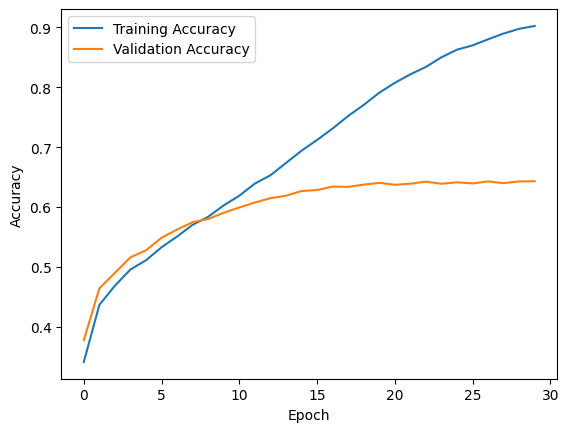

In [ ]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

In [ ]:
%run tuned_nn_models_v2.py

Training model:  model


  0%|          | 0/30 [00:00<?, ?it/s]

-------------------- Begin Epoch 0 --------------------



  7%|▋         | 24/352 [00:03<00:37,  8.71it/s]

Epoch 0, Batch 20: New best val acc 0.261, model weights saved to saved_models/E0B20_model.pt



 12%|█▏        | 42/352 [00:04<00:39,  7.75it/s]

Epoch 0, Batch 40: New best val acc 0.367, model weights saved to saved_models/E0B40_model.pt



 18%|█▊        | 63/352 [00:06<00:38,  7.52it/s]

Epoch 0, Batch 60: New best val acc 0.408, model weights saved to saved_models/E0B60_model.pt



 24%|██▍       | 84/352 [00:08<00:27,  9.83it/s]

Epoch 0, Batch 80: New best val acc 0.437, model weights saved to saved_models/E0B80_model.pt



 29%|██▉       | 102/352 [00:09<00:30,  8.16it/s]

Epoch 0, Batch 100: New best val acc 0.444, model weights saved to saved_models/E0B100_model.pt



 35%|███▍      | 123/352 [00:11<00:28,  8.02it/s]

Epoch 0, Batch 120: New best val acc 0.490, model weights saved to saved_models/E0B120_model.pt



 57%|█████▋    | 201/352 [00:17<00:20,  7.51it/s]


Epoch 0, Batch 200: New best val acc 0.497, model weights saved to saved_models/E0B200_model.pt


 80%|████████  | 282/352 [00:23<00:08,  8.14it/s]

Epoch 0, Batch 280: New best val acc 0.519, model weights saved to saved_models/E0B280_model.pt



  3%|▎         | 1/30 [00:29<14:04, 29.12s/it]

End of Epoch 0: train loss 1.501, val loss 1.531; train acc 0.461, val acc 0.456
Current total training time: 29.124 seconds; time for this epoch: 29.121 seconds
-------------------------------------------------------
-------------------- Begin Epoch 1 --------------------



  6%|▌         | 21/352 [00:01<00:43,  7.54it/s]

Epoch 1, Batch 20: New best val acc 0.483, model weights saved to saved_models/E1B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.10it/s]

Epoch 1, Batch 40: New best val acc 0.538, model weights saved to saved_models/E1B40_model.pt



 41%|████      | 144/352 [00:11<00:21,  9.86it/s]

Epoch 1, Batch 140: New best val acc 0.560, model weights saved to saved_models/E1B140_model.pt



 97%|█████████▋| 342/352 [00:27<00:01,  8.04it/s]

Epoch 1, Batch 340: New best val acc 0.570, model weights saved to saved_models/E1B340_model.pt



  7%|▋         | 2/30 [00:56<13:11, 28.25s/it]

End of Epoch 1: train loss 1.241, val loss 1.301; train acc 0.558, val acc 0.540
Current total training time: 56.765 seconds; time for this epoch: 27.640 seconds
-------------------------------------------------------
-------------------- Begin Epoch 2 --------------------



  7%|▋         | 24/352 [00:01<00:31, 10.33it/s]

Epoch 2, Batch 20: New best val acc 0.565, model weights saved to saved_models/E2B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.03it/s]

Epoch 2, Batch 40: New best val acc 0.577, model weights saved to saved_models/E2B40_model.pt



 29%|██▉       | 102/352 [00:08<00:31,  8.00it/s]

Epoch 2, Batch 100: New best val acc 0.591, model weights saved to saved_models/E2B100_model.pt



 58%|█████▊    | 204/352 [00:16<00:15,  9.83it/s]

Epoch 2, Batch 200: New best val acc 0.599, model weights saved to saved_models/E2B200_model.pt



 10%|█         | 3/30 [01:24<12:39, 28.14s/it]

End of Epoch 2: train loss 1.110, val loss 1.214; train acc 0.602, val acc 0.570
Current total training time: 84.769 seconds; time for this epoch: 28.003 seconds
-------------------------------------------------------
-------------------- Begin Epoch 3 --------------------



  7%|▋         | 24/352 [00:01<00:32,  9.99it/s]

Epoch 3, Batch 20: New best val acc 0.608, model weights saved to saved_models/E3B20_model.pt



 98%|█████████▊| 344/352 [00:27<00:00,  9.87it/s]

Epoch 3, Batch 340: New best val acc 0.609, model weights saved to saved_models/E3B340_model.pt



 13%|█▎        | 4/30 [01:52<12:10, 28.09s/it]

End of Epoch 3: train loss 0.997, val loss 1.186; train acc 0.642, val acc 0.584
Current total training time: 112.778 seconds; time for this epoch: 28.009 seconds
-------------------------------------------------------
-------------------- Begin Epoch 4 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.70it/s]

Epoch 4, Batch 20: New best val acc 0.607, model weights saved to saved_models/E4B20_model.pt



 12%|█▏        | 42/352 [00:03<00:39,  7.86it/s]

Epoch 4, Batch 40: New best val acc 0.621, model weights saved to saved_models/E4B40_model.pt



 58%|█████▊    | 204/352 [00:16<00:14,  9.94it/s]

Epoch 4, Batch 200: New best val acc 0.624, model weights saved to saved_models/E4B200_model.pt



 17%|█▋        | 5/30 [02:20<11:40, 28.02s/it]

End of Epoch 4: train loss 0.878, val loss 1.123; train acc 0.683, val acc 0.608
Current total training time: 140.687 seconds; time for this epoch: 27.909 seconds
-------------------------------------------------------
-------------------- Begin Epoch 5 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.22it/s]

Epoch 5, Batch 20: New best val acc 0.613, model weights saved to saved_models/E5B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.10it/s]

Epoch 5, Batch 40: New best val acc 0.624, model weights saved to saved_models/E5B40_model.pt



 24%|██▍       | 84/352 [00:06<00:26,  9.94it/s]

Epoch 5, Batch 80: New best val acc 0.634, model weights saved to saved_models/E5B80_model.pt



 20%|██        | 6/30 [02:48<11:11, 27.98s/it]

End of Epoch 5: train loss 0.757, val loss 1.118; train acc 0.727, val acc 0.616
Current total training time: 168.573 seconds; time for this epoch: 27.886 seconds
-------------------------------------------------------
-------------------- Begin Epoch 6 --------------------



  7%|▋         | 24/352 [00:01<00:31, 10.26it/s]

Epoch 6, Batch 20: New best val acc 0.617, model weights saved to saved_models/E6B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.05it/s]

Epoch 6, Batch 40: New best val acc 0.634, model weights saved to saved_models/E6B40_model.pt



 23%|██▎       | 81/352 [00:06<00:37,  7.17it/s]

Epoch 6, Batch 80: New best val acc 0.636, model weights saved to saved_models/E6B80_model.pt



 63%|██████▎   | 223/352 [00:18<00:16,  7.68it/s]

Epoch 6, Batch 220: New best val acc 0.638, model weights saved to saved_models/E6B220_model.pt



 23%|██▎       | 7/30 [03:17<10:51, 28.32s/it]

End of Epoch 6: train loss 0.630, val loss 1.130; train acc 0.773, val acc 0.622
Current total training time: 197.586 seconds; time for this epoch: 29.012 seconds
-------------------------------------------------------
-------------------- Begin Epoch 7 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.88it/s]

Epoch 7, Batch 20: New best val acc 0.625, model weights saved to saved_models/E7B20_model.pt



 18%|█▊        | 62/352 [00:04<00:36,  8.03it/s]


Epoch 7, Batch 60: New best val acc 0.631, model weights saved to saved_models/E7B60_model.pt


 24%|██▎       | 83/352 [00:06<00:34,  7.83it/s]

Epoch 7, Batch 80: New best val acc 0.638, model weights saved to saved_models/E7B80_model.pt



 81%|████████  | 284/352 [00:22<00:06,  9.91it/s]

Epoch 7, Batch 280: New best val acc 0.644, model weights saved to saved_models/E7B280_model.pt



 27%|██▋       | 8/30 [03:45<10:20, 28.21s/it]

End of Epoch 7: train loss 0.508, val loss 1.163; train acc 0.815, val acc 0.628
Current total training time: 225.574 seconds; time for this epoch: 27.988 seconds
-------------------------------------------------------
-------------------- Begin Epoch 8 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.13it/s]

Epoch 8, Batch 20: New best val acc 0.638, model weights saved to saved_models/E8B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.02it/s]

Epoch 8, Batch 40: New best val acc 0.644, model weights saved to saved_models/E8B40_model.pt



 75%|███████▌  | 264/352 [00:21<00:09,  9.59it/s]

Epoch 8, Batch 260: New best val acc 0.645, model weights saved to saved_models/E8B260_model.pt



 30%|███       | 9/30 [04:13<09:52, 28.22s/it]

End of Epoch 8: train loss 0.397, val loss 1.202; train acc 0.858, val acc 0.631
Current total training time: 253.817 seconds; time for this epoch: 28.243 seconds
-------------------------------------------------------
-------------------- Begin Epoch 9 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.23it/s]

Epoch 9, Batch 20: New best val acc 0.635, model weights saved to saved_models/E9B20_model.pt



 29%|██▉       | 102/352 [00:08<00:30,  8.17it/s]

Epoch 9, Batch 100: New best val acc 0.645, model weights saved to saved_models/E9B100_model.pt



 33%|███▎      | 10/30 [04:41<09:22, 28.10s/it]

End of Epoch 9: train loss 0.312, val loss 1.262; train acc 0.891, val acc 0.632
Current total training time: 281.655 seconds; time for this epoch: 27.837 seconds
-------------------------------------------------------
-------------------- Begin Epoch 10 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.87it/s]

Epoch 10, Batch 20: New best val acc 0.630, model weights saved to saved_models/E10B20_model.pt



 12%|█▏        | 42/352 [00:03<00:40,  7.75it/s]

Epoch 10, Batch 40: New best val acc 0.640, model weights saved to saved_models/E10B40_model.pt



 29%|██▉       | 102/352 [00:08<00:30,  8.16it/s]

Epoch 10, Batch 100: New best val acc 0.646, model weights saved to saved_models/E10B100_model.pt



 37%|███▋      | 11/30 [05:09<08:53, 28.06s/it]

End of Epoch 10: train loss 0.245, val loss 1.323; train acc 0.916, val acc 0.635
Current total training time: 309.604 seconds; time for this epoch: 27.948 seconds
-------------------------------------------------------
-------------------- Begin Epoch 11 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.17it/s]

Epoch 11, Batch 20: New best val acc 0.628, model weights saved to saved_models/E11B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.10it/s]

Epoch 11, Batch 40: New best val acc 0.647, model weights saved to saved_models/E11B40_model.pt



 24%|██▍       | 84/352 [00:06<00:27,  9.89it/s]

Epoch 11, Batch 80: New best val acc 0.652, model weights saved to saved_models/E11B80_model.pt



 40%|████      | 12/30 [05:37<08:23, 27.97s/it]

End of Epoch 11: train loss 0.205, val loss 1.384; train acc 0.932, val acc 0.638
Current total training time: 337.389 seconds; time for this epoch: 27.784 seconds
-------------------------------------------------------
-------------------- Begin Epoch 12 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.18it/s]

Epoch 12, Batch 20: New best val acc 0.627, model weights saved to saved_models/E12B20_model.pt



 18%|█▊        | 63/352 [00:04<00:35,  8.16it/s]

Epoch 12, Batch 60: New best val acc 0.640, model weights saved to saved_models/E12B60_model.pt



 35%|███▍      | 123/352 [00:09<00:27,  8.19it/s]

Epoch 12, Batch 120: New best val acc 0.644, model weights saved to saved_models/E12B120_model.pt



 43%|████▎     | 13/30 [06:05<07:55, 27.95s/it]

End of Epoch 12: train loss 0.174, val loss 1.478; train acc 0.944, val acc 0.632
Current total training time: 365.285 seconds; time for this epoch: 27.895 seconds
-------------------------------------------------------
-------------------- Begin Epoch 13 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.21it/s]

Epoch 13, Batch 20: New best val acc 0.644, model weights saved to saved_models/E13B20_model.pt



 69%|██████▉   | 243/352 [00:19<00:13,  8.23it/s]

Epoch 13, Batch 240: New best val acc 0.647, model weights saved to saved_models/E13B240_model.pt



 47%|████▋     | 14/30 [06:33<07:26, 27.92s/it]

End of Epoch 13: train loss 0.152, val loss 1.523; train acc 0.951, val acc 0.636
Current total training time: 393.136 seconds; time for this epoch: 27.850 seconds
-------------------------------------------------------
-------------------- Begin Epoch 14 --------------------



  7%|▋         | 24/352 [00:01<00:32,  9.98it/s]

Epoch 14, Batch 20: New best val acc 0.633, model weights saved to saved_models/E14B20_model.pt



 24%|██▍       | 84/352 [00:06<00:27,  9.84it/s]

Epoch 14, Batch 80: New best val acc 0.633, model weights saved to saved_models/E14B80_model.pt



 29%|██▉       | 102/352 [00:08<00:31,  7.85it/s]

Epoch 14, Batch 100: New best val acc 0.643, model weights saved to saved_models/E14B100_model.pt



 69%|██████▉   | 243/352 [00:19<00:13,  8.18it/s]

Epoch 14, Batch 240: New best val acc 0.648, model weights saved to saved_models/E14B240_model.pt



 50%|█████     | 15/30 [07:01<06:59, 27.94s/it]

End of Epoch 14: train loss 0.145, val loss 1.560; train acc 0.955, val acc 0.636
Current total training time: 421.137 seconds; time for this epoch: 27.998 seconds
-------------------------------------------------------
-------------------- Begin Epoch 15 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.20it/s]

Epoch 15, Batch 20: New best val acc 0.635, model weights saved to saved_models/E15B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.03it/s]

Epoch 15, Batch 40: New best val acc 0.642, model weights saved to saved_models/E15B40_model.pt



 18%|█▊        | 63/352 [00:05<00:36,  7.95it/s]

Epoch 15, Batch 60: New best val acc 0.644, model weights saved to saved_models/E15B60_model.pt



 53%|█████▎    | 16/30 [07:29<06:31, 27.94s/it]

End of Epoch 15: train loss 0.134, val loss 1.592; train acc 0.958, val acc 0.636
Current total training time: 449.067 seconds; time for this epoch: 27.930 seconds
-------------------------------------------------------
-------------------- Begin Epoch 16 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.17it/s]

Epoch 16, Batch 20: New best val acc 0.645, model weights saved to saved_models/E16B20_model.pt



 57%|█████▋    | 17/30 [07:56<06:02, 27.90s/it]

End of Epoch 16: train loss 0.125, val loss 1.623; train acc 0.963, val acc 0.639
Current total training time: 476.866 seconds; time for this epoch: 27.799 seconds
-------------------------------------------------------
-------------------- Begin Epoch 17 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.91it/s]

Epoch 17, Batch 20: New best val acc 0.643, model weights saved to saved_models/E17B20_model.pt



 24%|██▎       | 83/352 [00:06<00:33,  8.12it/s]

Epoch 17, Batch 80: New best val acc 0.645, model weights saved to saved_models/E17B80_model.pt



 60%|██████    | 18/30 [08:24<05:34, 27.90s/it]

End of Epoch 17: train loss 0.116, val loss 1.671; train acc 0.965, val acc 0.638
Current total training time: 504.783 seconds; time for this epoch: 27.916 seconds
-------------------------------------------------------
-------------------- Begin Epoch 18 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.25it/s]

Epoch 18, Batch 20: New best val acc 0.629, model weights saved to saved_models/E18B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.06it/s]

Epoch 18, Batch 40: New best val acc 0.652, model weights saved to saved_models/E18B40_model.pt



 63%|██████▎   | 19/30 [08:52<05:07, 27.92s/it]

End of Epoch 18: train loss 0.108, val loss 1.694; train acc 0.968, val acc 0.637
Current total training time: 532.752 seconds; time for this epoch: 27.968 seconds
-------------------------------------------------------
-------------------- Begin Epoch 19 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.21it/s]

Epoch 19, Batch 20: New best val acc 0.630, model weights saved to saved_models/E19B20_model.pt



 12%|█▏        | 42/352 [00:03<00:39,  7.90it/s]

Epoch 19, Batch 40: New best val acc 0.641, model weights saved to saved_models/E19B40_model.pt



 35%|███▍      | 123/352 [00:09<00:28,  8.04it/s]

Epoch 19, Batch 120: New best val acc 0.642, model weights saved to saved_models/E19B120_model.pt



 41%|████      | 144/352 [00:11<00:21,  9.64it/s]

Epoch 19, Batch 140: New best val acc 0.643, model weights saved to saved_models/E19B140_model.pt



 86%|████████▌ | 303/352 [00:24<00:06,  8.07it/s]

Epoch 19, Batch 300: New best val acc 0.644, model weights saved to saved_models/E19B300_model.pt



 67%|██████▋   | 20/30 [09:20<04:40, 28.01s/it]

End of Epoch 19: train loss 0.109, val loss 1.722; train acc 0.967, val acc 0.638
Current total training time: 560.969 seconds; time for this epoch: 28.216 seconds
-------------------------------------------------------
-------------------- Begin Epoch 20 --------------------



  6%|▌         | 21/352 [00:01<00:43,  7.64it/s]

Epoch 20, Batch 20: New best val acc 0.641, model weights saved to saved_models/E20B20_model.pt



 12%|█▏        | 42/352 [00:03<00:40,  7.68it/s]

Epoch 20, Batch 40: New best val acc 0.644, model weights saved to saved_models/E20B40_model.pt



 18%|█▊        | 63/352 [00:05<00:36,  7.82it/s]

Epoch 20, Batch 60: New best val acc 0.645, model weights saved to saved_models/E20B60_model.pt



 70%|███████   | 21/30 [09:49<04:12, 28.02s/it]

End of Epoch 20: train loss 0.100, val loss 1.732; train acc 0.971, val acc 0.639
Current total training time: 589.024 seconds; time for this epoch: 28.053 seconds
-------------------------------------------------------
-------------------- Begin Epoch 21 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.23it/s]

Epoch 21, Batch 20: New best val acc 0.639, model weights saved to saved_models/E21B20_model.pt



 12%|█▏        | 42/352 [00:03<00:38,  8.05it/s]

Epoch 21, Batch 40: New best val acc 0.647, model weights saved to saved_models/E21B40_model.pt



 73%|███████▎  | 22/30 [10:17<03:44, 28.01s/it]

End of Epoch 21: train loss 0.093, val loss 1.747; train acc 0.973, val acc 0.639
Current total training time: 617.007 seconds; time for this epoch: 27.982 seconds
-------------------------------------------------------
-------------------- Begin Epoch 22 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.09it/s]

Epoch 22, Batch 20: New best val acc 0.630, model weights saved to saved_models/E22B20_model.pt



 12%|█▏        | 42/352 [00:03<00:39,  7.82it/s]

Epoch 22, Batch 40: New best val acc 0.635, model weights saved to saved_models/E22B40_model.pt



 18%|█▊        | 63/352 [00:05<00:38,  7.57it/s]

Epoch 22, Batch 60: New best val acc 0.646, model weights saved to saved_models/E22B60_model.pt



 77%|███████▋  | 23/30 [10:45<03:16, 28.09s/it]

End of Epoch 22: train loss 0.097, val loss 1.798; train acc 0.971, val acc 0.636
Current total training time: 645.279 seconds; time for this epoch: 28.271 seconds
-------------------------------------------------------
-------------------- Begin Epoch 23 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.18it/s]

Epoch 23, Batch 20: New best val acc 0.639, model weights saved to saved_models/E23B20_model.pt



 35%|███▍      | 123/352 [00:09<00:28,  8.12it/s]

Epoch 23, Batch 120: New best val acc 0.642, model weights saved to saved_models/E23B120_model.pt



 92%|█████████▏| 324/352 [00:26<00:02,  9.76it/s]

Epoch 23, Batch 320: New best val acc 0.645, model weights saved to saved_models/E23B320_model.pt



 80%|████████  | 24/30 [11:13<02:48, 28.10s/it]

End of Epoch 23: train loss 0.092, val loss 1.795; train acc 0.973, val acc 0.635
Current total training time: 673.402 seconds; time for this epoch: 28.122 seconds
-------------------------------------------------------
-------------------- Begin Epoch 24 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.84it/s]

Epoch 24, Batch 20: New best val acc 0.648, model weights saved to saved_models/E24B20_model.pt



 83%|████████▎ | 25/30 [11:41<02:20, 28.07s/it]

End of Epoch 24: train loss 0.083, val loss 1.783; train acc 0.977, val acc 0.639
Current total training time: 701.386 seconds; time for this epoch: 27.983 seconds
-------------------------------------------------------
-------------------- Begin Epoch 25 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.14it/s]

Epoch 25, Batch 20: New best val acc 0.640, model weights saved to saved_models/E25B20_model.pt



 24%|██▍       | 84/352 [00:06<00:27,  9.78it/s]

Epoch 25, Batch 80: New best val acc 0.643, model weights saved to saved_models/E25B80_model.pt



 87%|████████▋ | 26/30 [12:09<01:52, 28.04s/it]

End of Epoch 25: train loss 0.085, val loss 1.836; train acc 0.975, val acc 0.636
Current total training time: 729.354 seconds; time for this epoch: 27.968 seconds
-------------------------------------------------------
-------------------- Begin Epoch 26 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.12it/s]

Epoch 26, Batch 20: New best val acc 0.638, model weights saved to saved_models/E26B20_model.pt



 52%|█████▏    | 183/352 [00:14<00:20,  8.11it/s]

Epoch 26, Batch 180: New best val acc 0.642, model weights saved to saved_models/E26B180_model.pt



 80%|████████  | 282/352 [00:22<00:08,  7.97it/s]

Epoch 26, Batch 280: New best val acc 0.642, model weights saved to saved_models/E26B280_model.pt



 90%|█████████ | 27/30 [12:37<01:24, 28.06s/it]

End of Epoch 26: train loss 0.083, val loss 1.858; train acc 0.976, val acc 0.636
Current total training time: 757.454 seconds; time for this epoch: 28.099 seconds
-------------------------------------------------------
-------------------- Begin Epoch 27 --------------------



  7%|▋         | 24/352 [00:01<00:33,  9.76it/s]

Epoch 27, Batch 20: New best val acc 0.638, model weights saved to saved_models/E27B20_model.pt



 18%|█▊        | 63/352 [00:05<00:35,  8.10it/s]

Epoch 27, Batch 60: New best val acc 0.641, model weights saved to saved_models/E27B60_model.pt



 52%|█████▏    | 183/352 [00:14<00:21,  7.85it/s]

Epoch 27, Batch 180: New best val acc 0.643, model weights saved to saved_models/E27B180_model.pt



 93%|█████████▎| 28/30 [13:05<00:56, 28.05s/it]

End of Epoch 27: train loss 0.085, val loss 1.852; train acc 0.975, val acc 0.636
Current total training time: 785.504 seconds; time for this epoch: 28.049 seconds
-------------------------------------------------------
-------------------- Begin Epoch 28 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.14it/s]

Epoch 28, Batch 20: New best val acc 0.635, model weights saved to saved_models/E28B20_model.pt



 18%|█▊        | 63/352 [00:05<00:35,  8.08it/s]

Epoch 28, Batch 60: New best val acc 0.644, model weights saved to saved_models/E28B60_model.pt



 97%|█████████▋| 29/30 [13:33<00:28, 28.04s/it]

End of Epoch 28: train loss 0.077, val loss 1.864; train acc 0.978, val acc 0.636
Current total training time: 813.507 seconds; time for this epoch: 28.003 seconds
-------------------------------------------------------
-------------------- Begin Epoch 29 --------------------



  7%|▋         | 24/352 [00:01<00:32, 10.17it/s]

Epoch 29, Batch 20: New best val acc 0.637, model weights saved to saved_models/E29B20_model.pt



 24%|██▍       | 84/352 [00:06<00:28,  9.50it/s]

Epoch 29, Batch 80: New best val acc 0.637, model weights saved to saved_models/E29B80_model.pt



 29%|██▉       | 102/352 [00:08<00:31,  7.86it/s]

Epoch 29, Batch 100: New best val acc 0.637, model weights saved to saved_models/E29B100_model.pt



 46%|████▌     | 162/352 [00:13<00:23,  8.08it/s]

Epoch 29, Batch 160: New best val acc 0.644, model weights saved to saved_models/E29B160_model.pt



 80%|████████  | 283/352 [00:23<00:08,  7.96it/s]

Epoch 29, Batch 280: New best val acc 0.646, model weights saved to saved_models/E29B280_model.pt



100%|██████████| 30/30 [14:02<00:00, 28.07s/it]

End of Epoch 29: train loss 0.077, val loss 1.847; train acc 0.978, val acc 0.639
Current total training time: 842.060 seconds; time for this epoch: 28.552 seconds
-------------------------------------------------------


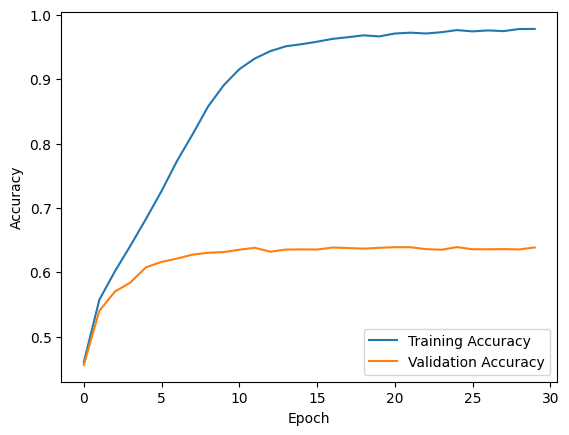

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() # about 10 when validation accuracy didn't improve

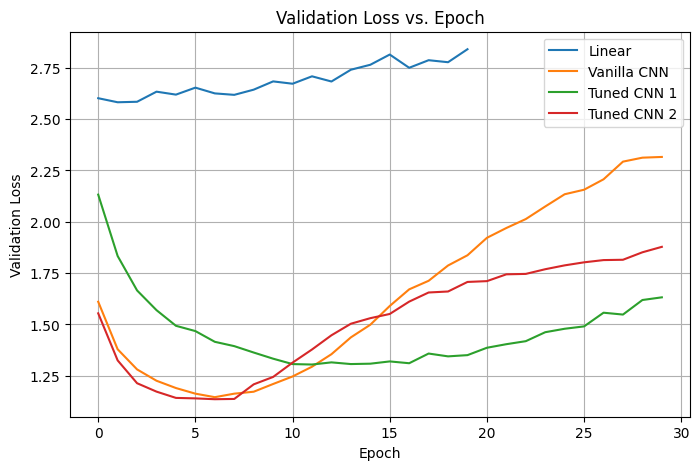

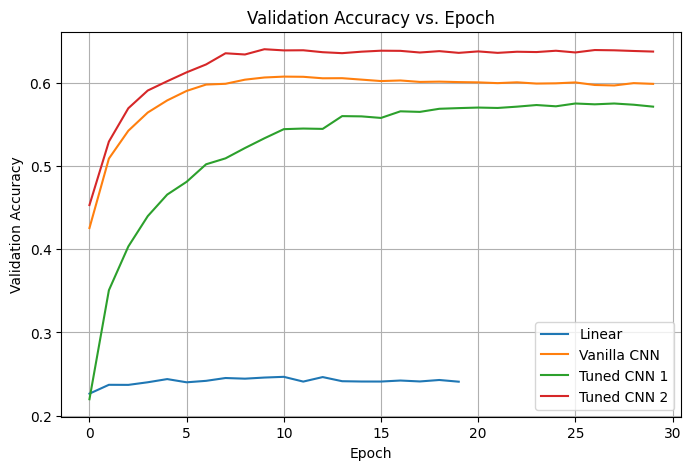

In [ ]:
# four models comparison
import matplotlib.pyplot as plt

# 每个模型的验证 loss / accuracy 列表
val_loss_total_lst = [val_loss_lm, val_loss_cnn, val_loss_tuned, val_loss_tuned2]
val_acc_total_lst = [val_acc_lm, val_acc_cnn, val_acc_tuned, val_acc_tuned2]
model_names = ['Linear', 'Vanilla CNN', 'Tuned CNN 1', 'Tuned CNN 2']

# 画验证 Loss 曲线图
plt.figure(figsize=(8, 5))
for i in range(len(val_loss_total_lst)):
    plt.plot(val_loss_total_lst[i], label=model_names[i])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 画验证 Accuracy 曲线图
plt.figure(figsize=(8, 5))
for i in range(len(val_acc_total_lst)):
    plt.plot(val_acc_total_lst[i], label=model_names[i])
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

Tune your neural network by adding batchnorm, more layers, better activations, improved learning rates, etc. Compare the accuracy of the linear model, the simple conv net, and the tuned conv net. Do this by making learning curves, which show the training epoch on the X-axis and the cross entropy loss on the Y-axis. Note that your overall graph will have 3 total curves: the linear model cross entropy loss vs epoch, the vanialla conv net cross entropy loss vs epoch, and the tuned convolutional model cross entropy loss vs epoch. Make a similar curve that shows the training epoch on the X-axis and the model test accuracy on the Y-axis for all three models. What hyper-parameters are important for learning?

Actually I think adding Batchnorm and also changed the activation function is very important; however, adding more layers can improve the training performance but can't improve the testing accuracy.

# Feature attributes on Animal Images

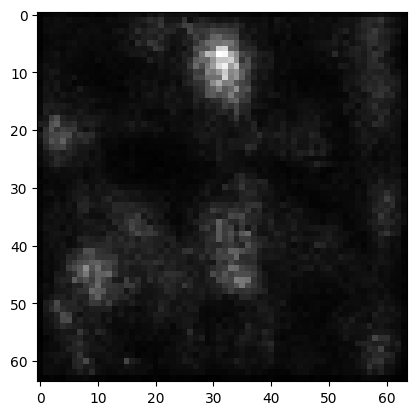

In [ ]:
from smooth_grad import *

model = VanillaCNN()

# train_images, train_labels = load_data('data_batch_1.bin', id_bytes=4, label_bytes=4, num_images=50000, height=64, width=64, depth=3)

# # Split training data into training and validation sets
# train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# norm_train_images = normalize(train_images)
# norm_val_images = normalize(val_images)

# # initialize a Dataset object for each dataset
# dataset_train = TensorDataset(norm_train_images, train_labels)
# dataset_val = TensorDataset(norm_val_images, val_labels)

# The weights from your pretrained model should be saved in a .pt file.
model_weights = 'saved_models_cnn/E16B80_Vanilla.pt'

# Uncomment the following line to load the weights into the model.
# 'torch.load' will load the weights, and 'model.load_state_dict' will apply these weights to your model.
# Make sure that the architecture of 'model' matches the architecture of the model that the weights came from.
model.load_state_dict(torch.load(model_weights))

# Set the model to evaluation mode.
# This step is necessary because it tells your model that it will be used for inference, not training.
# In evaluation mode, certain layers like dropout are disabled.
model.eval()

# Initialize SmoothGrad. It will average the gradients over 25 noisy versions of the input. Each noisy version is
# obtained by adding Gaussian noise to the input with a standard deviation of 15% of the input's range.
# You can change these numbers to vary noise levels and number of images for averaging.
smooth_grad = SmoothGrad(pretrained_model=model, cuda=False, stdev_spread=0.15, n_samples=25, magnitude=True)

# Here, you will need to replace 'YOUR_IMAGE_TENSOR' with your actual image tensor. Something like norm_train_images[0].
example_image = norm_train_images[2]

# Compute the SmoothGrad saliency map
# The image tensor is unsqueezed to add an extra dimension because the model expects a batch of images.
# The dtype is set to float32, as the model expects input data in this format.
smooth_saliency = smooth_grad(example_image.to(dtype=torch.float32).unsqueeze(0))

# Convert the saliency map to absolute values, because we are interested in the magnitude of the gradients,
# regardless of their direction.
abs_saliency = np.abs(smooth_saliency.numpy())

# Sum the absolute gradients across all color channels to get a single saliency map.
# 'squeeze' is used to remove the extra dimension that was added earlier.
saliency_map = np.sum(abs_saliency, axis=1).squeeze()

# Display the final saliency map. The brighter a pixel in the saliency map, the more important it is for the model's decision.
plt.imshow(saliency_map, cmap='grey')
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=23251cd7cf45e8972bc2fcab82f8dbd6fd5d5ee2e5eea02898b9cb2819029301
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


  0%|          | 0/5000 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/skimage/color/colorlabel.py:149: UserWarning: Negative intensities in `image` are not supported
  rgb = _label2rgb_overlay(


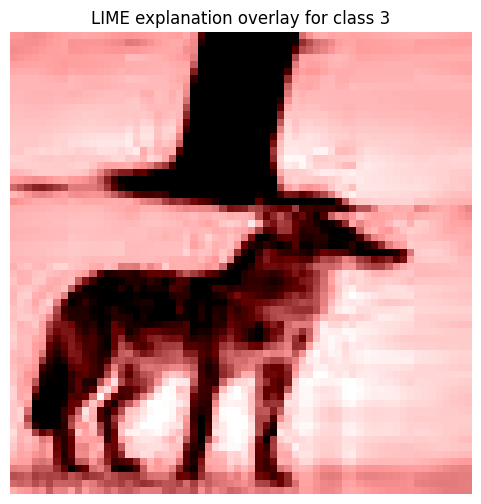

In [ ]:
import torch
import torch.nn.functional as F
from lime import lime_image
from skimage.segmentation import mark_boundaries
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

# Predict function: returns probabilities
def predict_fn(images, model):
    images = torch.from_numpy(images).permute(0, 3, 1, 2).float()
    model.eval()
    with torch.no_grad():
        outputs = model(images)
        probs = F.softmax(outputs, dim=1)
    return probs.numpy()

# Load model
model = VanillaCNN()
model_weights = 'saved_models_cnn/E16B80_Vanilla.pt'
model.load_state_dict(torch.load(model_weights, map_location=torch.device("cpu")))
model.eval()

# Set device
device = torch.device("cpu")
model.to(device)

# Initialize LIME
explainer = lime_image.LimeImageExplainer()

# Select and convert the input image
example_image = norm_train_images[2]  # shape: (C, H, W)
test_image = example_image.permute(1, 2, 0).numpy()  # shape: (H, W, C)

# Explain instance
explanation = explainer.explain_instance(
    test_image,
    lambda x: predict_fn(x, model),
    top_labels=5,
    hide_color=0,
    num_samples=5000
)

# Get mask for the top prediction
label_to_explain = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(
    label_to_explain,
    positive_only=True,
    num_features=10,
    hide_rest=False
)

highlighted_img = label2rgb(mask, image=test_image, bg_label=0, alpha=0.4)

# Clip the image to valid range
highlighted_img = np.clip(highlighted_img, 0, 1)

# Plot the result
plt.figure(figsize=(6, 6))
plt.imshow(highlighted_img.astype(np.float32))
plt.title(f"LIME explanation overlay for class {label_to_explain}")
plt.axis('off')
plt.show()

